# Status + LTD

In [1]:
#Contains extended data by incorporating longer simulations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from analyze_simulations_funs import *

In [2]:
outputs_dir_test = Path("../../outputs/LtdStatus/outputs/test2")
# outputs_dir = Path("../../outputs/LtdStatus/outputs/anal")
# outputs_dir_new = Path("../../outputs/LtdStatus/outputs/n100")
# outputs_dir_sepa = Path("../../outputs/LtdStatus/outputs/sepa_0_2")
outputs_dir_triads_slash = Path("../../outputs/LtdReal/outputs/slash-s400-triads")
outputs_dir_triads_wiki = Path("../../outputs/LtdReal/outputs/wiki-s400-triads")
outputs_dir_triads_wiki1000 = Path("../../outputs/LtdReal/outputs/wiki-s1000-triads")
# outputs_dir_triads_long = Path("../../outputs/LtdStatus/outputs/triads_distr_long")
# outputs_dir_triads_n100 = Path("../../outputs/LtdStatus/outputs/triads_distr_n100")
outputs_dir_triads_wiki2 = Path("../../outputs/LtdReal/outputs/wiki2-s400-triads")
outputs_dir_triads_wiki2_1000 = Path("../../outputs/LtdReal/outputs/wiki2-s1000-triads")
outputs_slash_rhoinits = Path("../../outputs/LtdReal/outputs/slash-rhoinits-triads")
outputs_epi_rhoinits = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads")
outputs_epi_rhoinits_new = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads2")
outputs_epi_rhoinits_s2000 = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000")
outputs_epi_rhoinits_s2000_new = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000-2")
outputs_epi_rhoinits_replonger = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-replonger")

## Process data

In [3]:
# df, rho_inits = process_folder(outputs_dir_test)
df_erho, df_files, last_file_processed = process_folder(outputs_epi_rhoinits, no_triad_stats=False)
print(len(df_erho))
df_wrho_copy = df_erho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_erho

2867


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.1,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9003642577685839, 0.910299650732263, 0.9173...","[0.0010117685716456851, 0.0009675247922526496,...","[0.009039414639290502, 0.008582654632237039, 0...","[0.009028832621951135, 0.0081996038494095, 0.0...","[0.0807593108297004, 0.07300570252143018, 0.06...","[0.009015787548851746, 0.008655086716439246, 0...","[0.08133621322327063, 0.07206362930536446, 0.0...","[0.08139943165444459, 0.07265084004341181, 0.0...","[0.7284092409108454, 0.7558749581394552, 0.776...","[600642.0, 607270.0, 611991.0, 615978.0, 61863..."
1,1,0.1,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.799317953560882, 0.8260466789584926, 0.8410...","[0.008099804478984798, 0.006178347313303338, 0...","[0.032280717566595785, 0.027615781181396484, 0...","[0.032125545053714226, 0.026947563276130536, 0...","[0.12823379836130164, 0.11731087585989154, 0.1...","[0.03215136152705078, 0.02756597272047154, 0.0...","[0.12826025340465005, 0.11609595080018752, 0.1...","[0.12801805292158094, 0.11601567342726819, 0.1...","[0.5108304666861218, 0.5622698354213509, 0.596...","[533233.0, 551064.0, 561079.0, 569388.0, 57481..."
2,2,0.1,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.600610094287299, 0.6918694068444484, 0.7276...","[0.06386931646462464, 0.035355888295130276, 0....","[0.09626972029630014, 0.07338163780983988, 0.0...","[0.09591066150106098, 0.07139413426007479, 0.0...","[0.14424101529712707, 0.14480998117769278, 0.1...","[0.09552441786817416, 0.07260167015249873, 0.0...","[0.14393185618710028, 0.14318281356319057, 0.1...","[0.14409587745586044, 0.1421484213682676, 0.13...","[0.21615713492975228, 0.3171254533733054, 0.37...","[400673.0, 461553.0, 485404.0, 502807.0, 51534..."
3,3,0.1,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3997736505224026, 0.5924765031254215, 0.650...","[0.21809738429863987, 0.08556847281329226, 0.0...","[0.1441482401968328, 0.11075914753822594, 0.08...","[0.14412443065781924, 0.10501566640299807, 0.0...","[0.09541832402191827, 0.13507954256128424, 0.1...","[0.14439518434284715, 0.10773150466343119, 0.0...","[0.09516809580155726, 0.13299962880837454, 0.1...","[0.09548318449026559, 0.13210845874468266, 0.1...","[0.06316515619011981, 0.1907375784677111, 0.27...","[266693.0, 395247.0, 434017.0, 456977.0, 47384..."
4,4,0.1,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.1995982671523437, 0.5168068234623975, 0.590...","[0.5135383684335504, 0.1380434196591806, 0.077...","[0.12823480182846314, 0.13290010311081205, 0.1...","[0.12795082062176102, 0.11982811884663674, 0.0...","[0.03193926505882644, 0.11966282043785287, 0.1...","[0.1270668572767744, 0.12575195039807086, 0.10...","[0.03170290293015148, 0.11463800423882774, 0.1...","[0.03164470183478497, 0.1167305981676872, 0.13...","[0.007922282015688205, 0.13244498514093195, 0....","[133154.0, 344767.0, 394107.0, 422460.0, 44352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,2,0.6,0.6,0.8,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6002683215661585, 0.710866273927838, 0.7529...","[0.0637867584845201, 0.02875790925974866, 0.01...","[0.09554330129566768, 0.06751144613940184, 0.0...","[0.09552076889667782, 0.06069927247718549, 0.0...","[0.1438485684126965, 0.1452827054350427, 0.137...","[0.09603308449476294, 0.06387935113623955, 0.0...","[0.14410472621173906, 0.13934975145486775, 0.1...","[0.1441919366305014, 0.14228899799516384, 0.13...","[0.2169708555734345, 0.3522305661023502, 0.440...","[400445.0, 474226.0, 502326.0, 520165.0, 53541..."
2863,3,0.6,0.6,0.8,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.39975716148761076, 0.5994708518834975, 0.66...","[0.21658561540770915, 0.08390828200674823, 0.0...","[0.14403366249184796, 0.11219693353206849, 0.0...","[0.14369595017986236, 0.0

In [4]:
# df, rho_inits = process_folder(outputs_dir_test)
df_erho2, df_files2, last_file_processed = process_folder(outputs_epi_rhoinits_new, no_triad_stats=False)
print(len(df_erho2))
# df_erho_copy = df_erho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_erho2

252


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.950,0.1,0.8,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9004721859963124, 0.9367750445953441, 0.946...","[0.0010021900214678115, 0.00027476755367386206...","[0.00894435893181103, 0.003983490958259141, 0....","[0.00894061873602729, 0.0025335721341912918, 0...","[0.08088684238349723, 0.04943690440232903, 0.0...","[0.008951748099091106, 0.003237002614396853, 0...","[0.08054301804425527, 0.04483701093405187, 0.0...","[0.08086184692874736, 0.045851333785744984, 0....","[0.7298693768551029, 0.849845917617353, 0.8955...","[600714.0, 624932.0, 631163.0, 634326.0, 63659..."
1,1,0.950,0.1,0.8,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.8001978684175024, 0.8732098154727106, 0.892...","[0.00796223825357305, 0.0018679997332601837, 0...","[0.03186966092753389, 0.013868098620387735, 0....","[0.03192001673418328, 0.009974737258088014, 0....","[0.12770396770003412, 0.08945134338254002, 0.0...","[0.03183627283834244, 0.012080649932909098, 0....","[0.12774474495650562, 0.08080610888914087, 0.0...","[0.12803766614337375, 0.08346520564280602, 0.0...","[0.5129254324464538, 0.708485856540868, 0.7894...","[533820.0, 582527.0, 595405.0, 602941.0, 60795..."
2,2,0.950,0.1,0.8,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.5999250498418551, 0.7491942857999431, 0.793...","[0.0637374061450322, 0.016180086960464215, 0.0...","[0.09573021986056733, 0.050231832842805135, 0....","[0.09612950856655354, 0.03832742823316891, 0.0...","[0.14433497631315764, 0.13958958010646422, 0.1...","[0.09590190396946978, 0.04528245912946669, 0.0...","[0.14387867242754124, 0.12424538129152245, 0.1...","[0.14393295087854918, 0.13206439741386444, 0.1...","[0.21635436183912907, 0.45407883402224397, 0.5...","[400216.0, 499795.0, 529293.0, 546373.0, 55747..."
3,3,0.950,0.1,0.8,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3985189848750581, 0.6196549294719012, 0.689...","[0.2174028025743129, 0.06975620217965839, 0.03...","[0.14398759422670676, 0.10509576132734258, 0.0...","[0.14404351471488808, 0.07964683064475593, 0.0...","[0.09534215174193233, 0.14155464248152685, 0.1...","[0.14444325954231133, 0.09429973180971744, 0.0...","[0.09585218673283225, 0.12595647525044032, 0.1...","[0.09565039860908504, 0.14208502048851884, 0.1...","[0.0632780918579313, 0.24160533581803967, 0.39...","[265856.0, 413378.0, 460198.0, 486179.0, 50384..."
4,4,0.950,0.1,0.8,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.19992804784818097, 0.470361709463207, 0.566...","[0.5138998902845495, 0.22840271837429563, 0.11...","[0.12803967307769673, 0.15587202071740056, 0.1...","[0.12762971113008373, 0.11524008453572265, 0.0...","[0.03181191595360442, 0.09244377368239516, 0.1...","[0.12734892277344093, 0.1340574656451614, 0.11...","[0.03179722884333168, 0.08024763380162712, 0.1...","[0.03160958048413277, 0.10715460226986097, 0.1...","[0.007863077453160205, 0.08658170097353647, 0....","[133374.0, 313783.0, 378210.0, 414929.0, 44028..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2,0.950,0.2,0.9,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.20079447167633524, 0.5249793887065102, 0.62...","[0.5102694373185606, 0.17342649279195854, 0.07...","[0.1279098609167147, 0.14870388988571695, 0.10...","[0.12845665929544017, 0.10106857393541485, 0.0...","[0.03231109525430275, 0.10827629610783368, 0.1...","[0.12836443154087035, 0.1244696105899721, 0.09...","[0.032258914961905194, 0.09051666061089439, 0....","[0.032308176077105684, 0.12376316970828206, 0....","[0.00812142463510057, 0.12977530636992743, 0.2...","[133952.0, 350219.0, 417747.0, 454768.0, 47965..."
248,3,0.950,0.2,0.9,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3996837103326288, 0.6668615370778432, 0.739...","[0.2137312074547028, 0.04867189752812285, 0.01...","[0.1436327317486884, 0.08935647012363536, 0.05...","[0.1437742206

In [5]:
# df, rho_inits = process_folder(outputs_dir_test)
df_erho_s2000, df_files_s2000, last_file_processed = process_folder(outputs_epi_rhoinits_s2000, no_triad_stats=False)
print(len(df_erho_s2000))
# df_wrho_copy = df_erho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_erho_s2000

341


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.1,1.0,0.1,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.39970469637690936, 0.8149795386068265, 0.88...","[0.21704164562046335, 0.0098890776522116, 0.00...","[0.14420242742355335, 0.03489338115797009, 0.0...","[0.14380779115622497, 0.026741122713725505, 0....","[0.09556154615314934, 0.11480284652617458, 0.0...","[0.14445867644688334, 0.033525655416857134, 0....","[0.0958966129608001, 0.10933796436469172, 0.05...","[0.09555461310730631, 0.10612404149500916, 0.0...","[0.06347668713161922, 0.5646859106733603, 0.82...","[266647.0, 543681.0, 591599.0, 605014.0, 61039..."
1,1,0.1,1.0,0.1,0.0,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[1.4990031628966737e-06, 0.6799163556235104, 0...","[0.9999994526542756, 0.049452138858326215, 0.0...","[1.8244857481664147e-07, 0.08674325918653661, ...","[1.8244857481664147e-07, 0.058509615906523565,...","[0.0, 0.13108966590290652, 0.08142515690349374...","[1.8244857481664147e-07, 0.07596547452639314, ...","[0.0, 0.11870651623295143, 0.07708662101864142...","[0.0, 0.12477384358847884, 0.07551090390223748...","[0.0, 0.35475948579788363, 0.6802603322224343,...","[1.0, 453579.0, 532005.0, 558753.0, 569629.0, ..."
2,0,0.9,0.5,1.0,0.6,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.5999925049841855, 0.8644016728875298, 0.903...","[0.06449675711341907, 0.002114943879274508, 0....","[0.09635537990217655, 0.014655911566445991, 0....","[0.09634397686625051, 0.007453024281259804, 0....","[0.14367852634096737, 0.08372638077765604, 0.0...","[0.09655260681155334, 0.014302143779876524, 0....","[0.1440866638028322, 0.07368039735110213, 0.03...","[0.143884875679085, 0.07447523456729083, 0.038...","[0.21460121348371597, 0.7295919637970942, 0.86...","[400261.0, 576651.0, 602896.0, 614550.0, 62148..."
3,1,0.9,0.5,1.0,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.4011362443974757, 0.7829503380252132, 0.847...","[0.21519855011766564, 0.010856146323027208, 0....","[0.14417989502456352, 0.04011770487355721, 0.0...","[0.14406112100235788, 0.019485234117555084, 0....","[0.09626926417486309, 0.11829846999537402, 0.0...","[0.1436437698874648, 0.03705795104959472, 0.01...","[0.09633914197901787, 0.10089917043369759, 0.0...","[0.09595809813051331, 0.1082523041202453, 0.06...","[0.0643501596835539, 0.5650330190869489, 0.767...","[267602.0, 522314.0, 565348.0, 584989.0, 59642..."
4,2,0.9,0.5,1.0,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.2004856770247785, 0.6823762198138238, 0.776...","[0.5100553339160133, 0.044450402404015404, 0.0...","[0.1280187827158802, 0.08901419659727934, 0.03...","[0.12788504791053962, 0.04188107034916005, 0.0...","[0.032147530106979634, 0.13473124823195928, 0....","[0.12921299986234255, 0.0758269048338199, 0.03...","[0.032280626342308376, 0.10885438441714021, 0....","[0.03230799362853087, 0.13657215435185918, 0.0...","[0.008091685517405457, 0.3686696388147666, 0.6...","[133746.0, 455220.0, 518167.0, 548185.0, 56561..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0,0.7,1.0,0.6,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.39970619538007224, 0.7212303817961055, 0.81...","[0.21704137194760115, 0.03404754956512014, 0.0...","[0.14420224497497855, 0.07354520295716299, 0.0...","[0.14380788238051237, 0.05545050065257294, 0.0...","[0.09556172860172416, 0.14147746673437941, 0.1...","[0.14445867644688334, 0.06654109339423954, 0.0...","[0.09589643051222528, 0.12866592781075484, 0.0...","[0.09555470433159372, 0.13578461507866316, 0.1...","[0.06347696080448145, 0.36448764380710696, 0.6...","[266648.0, 481140.0, 544667.0, 574648.0, 59040..."
337,1,0.7,1.0,0.6,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.20005096610753847, 0.6168457975446329, 0.73...","[0.5098583806794987, 0.09397123315076009, 0.02...","[0.12840621226450336, 0.1188937084707133, 0.06...","[0.12855864804876266, 0.085

In [6]:
# df, rho_inits = process_folder(outputs_dir_test)
df_erho_s2000_2, df_files_s2000_2, last_file_processed = process_folder(outputs_epi_rhoinits_s2000_new, no_triad_stats=False)
print(len(df_erho_s2000_2))
# df_wrho_copy = df_erho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_erho_s2000_2.head(5)

124


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.95,0.2,0.9,0.8,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.8006730524201406, 0.9171590892056782, 0.935...","[0.007921643445676347, 0.00038186486709123056,...","[0.031694783968572136, 0.004644775817682059, 0...","[0.03169742947290698, 0.0023989250859766105, 0...","[0.1275645769888742, 0.05145515053695072, 0.03...","[0.0316977031457692, 0.004500002873565053, 0.0...","[0.12741706731613495, 0.04440853045609498, 0.0...","[0.12799132420537032, 0.04553588019988701, 0.0...","[0.5140154714566959, 0.8466748701627523, 0.914...","[534137.0, 611846.0, 624115.0, 630125.0, 63374..."
1,1,0.95,0.2,0.9,0.6,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.6011542324354304, 0.8321761028915771, 0.872...","[0.06379423887608758, 0.0035754447206817227, 0...","[0.09558635915932441, 0.020412437774773255, 0....","[0.09579663114180058, 0.010963517309306801, 0....","[0.14388122670758866, 0.09800243441133377, 0.0...","[0.09582472822232235, 0.018930499225825084, 0....","[0.1442049817036008, 0.08438502013274411, 0.04...","[0.14418509480894579, 0.08776022754256457, 0.0...","[0.21672673938032982, 0.6759704188827707, 0.82...","[401036.0, 555153.0, 582187.0, 595337.0, 60317..."
2,2,0.95,0.2,0.9,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.39957878011122605, 0.7401762827719567, 0.80...","[0.21767191422216745, 0.017122707522254393, 0....","[0.1441174976119762, 0.05216268611008965, 0.02...","[0.14464386175032223, 0.02738954494862385, 0.0...","[0.09569427749132844, 0.13123370905272427, 0.0...","[0.14412789718074076, 0.04792723367000873, 0.0...","[0.09529936755113783, 0.11006839723397013, 0.0...","[0.0953450709191294, 0.12319447750057859, 0.07...","[0.06310011327319767, 0.4909012439617504, 0.69...","[266563.0, 493779.0, 536935.0, 558095.0, 57123..."
3,3,0.95,0.2,0.9,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.1995577940669455, 0.6262190643222257, 0.719...","[0.5146597885986608, 0.070911831452547, 0.0195...","[0.12728853229517662, 0.10991158268391524, 0.0...","[0.12738267575978202, 0.05519105877918368, 0.0...","[0.031693233155686194, 0.13577138755698895, 0....","[0.1278221943765153, 0.09458900402508923, 0.05...","[0.031640596741851594, 0.10638056419120136, 0....","[0.031660757309368834, 0.14108009373842878, 0....","[0.007852221762958616, 0.2861644775726458, 0.5...","[133127.0, 417757.0, 479864.0, 511823.0, 53207..."
4,4,0.95,0.2,0.9,0.0,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.0, 0.4372127535189099, 0.5613871775269446, ...","[1.0, 0.36696182893019547, 0.14885313281991697...","[0.0, 0.17336208844504827, 0.16402957017031483...","[0.0, 0.07520767437089222, 0.04477780637152386...","[0.0, 0.05843663647659691, 0.10534243180049467...","[0.0, 0.11093931550585738, 0.11034681375914034...","[0.0, 0.03446727251148582, 0.06224296986870909...","[0.0, 0.10828359405082634, 0.14762598370570024...","[0.0, 0.07234158970909761, 0.2167812915042, 0....","[0.0, 291669.0, 374507.0, 422211.0, 454921.0, ..."


In [7]:
# df, rho_inits = process_folder(outputs_dir_test)
df_erho_reps, df_files_reps, last_file_processed = process_folder(outputs_epi_rhoinits_replonger, no_triad_stats=False)
print(len(df_erho_reps))
# df_wrho_copy = df_erho.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
df_erho_reps

288


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6009908410906747, 0.7980183178186506, 0.841...","[0.06395944606058405, 0.008554192654565643, 0....","[0.09612312286643496, 0.03509681131889064, 0.0...","[0.09573633188782368, 0.024090965940226382, 0....","[0.14411357496761765, 0.12332191783008802, 0.0...","[0.09607714582558118, 0.03206360376256398, 0.0...","[0.14423627163418185, 0.11098958008821935, 0.0...","[0.1437203982888878, 0.11627548019780709, 0.08...","[0.21603370846888884, 0.5496074482076388, 0.70...","[400927.0, 532366.0, 561702.0, 577577.0, 58698..."
1,1,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.5997061953800723, 0.7984215496694698, 0.842...","[0.06437606738117786, 0.008784625204559061, 0....","[0.09647433637295699, 0.03530005903123638, 0.0...","[0.09607960888134119, 0.024175074733216853, 0....","[0.14414760162682097, 0.12390794265239907, 0.0...","[0.09605215037083129, 0.031985971893979497, 0....","[0.1439538412403657, 0.11006639029964715, 0.07...","[0.14347965739441723, 0.1146902757555127, 0.08...","[0.21543673673208877, 0.5510896604294493, 0.70...","[400070.0, 532635.0, 561926.0, 576794.0, 58678..."
2,2,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6001109262340544, 0.7990601250168637, 0.843...","[0.06417564762174177, 0.008715294746128737, 0....","[0.09597515707225866, 0.034984240548228775, 0....","[0.09633239138174965, 0.02448760914187776, 0.0...","[0.14439746495003236, 0.12432018520719727, 0.0...","[0.09601018719862346, 0.031622716781519566, 0....","[0.14377905550569134, 0.11010251511746084, 0.0...","[0.14387858120325384, 0.115096953628779, 0.080...","[0.21545151506664892, 0.5506704848288081, 0.70...","[400340.0, 533061.0, 562649.0, 577517.0, 58753..."
3,3,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6007704876257289, 0.7987153542893975, 0.843...","[0.06330153649979525, 0.008432773128025168, 0....","[0.09559566403664005, 0.03456086863036676, 0.0...","[0.09532180872584027, 0.023767484617076475, 0....","[0.14418491236037095, 0.12293786358009898, 0.0...","[0.09550398362779469, 0.0317239757405428, 0.01...","[0.14429301314094983, 0.11021006855231526, 0.0...","[0.1441821756317487, 0.11491523484826162, 0.08...","[0.21761690597686023, 0.5534517309033129, 0.70...","[400780.0, 532831.0, 562442.0, 577962.0, 58762..."
4,0,0.925,0.1,0.8,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.800260826550344, 0.8617559323050171, 0.8797...","[0.007938063817409845, 0.0022621798791515376, ...","[0.031867745217498314, 0.01586919458897666, 0....","[0.031925398967140375, 0.01181053481789306, 0....","[0.12794270166018168, 0.09473687859497812, 0.0...","[0.03208914656303831, 0.013866274134639568, 0....","[0.12815589281985493, 0.08612886361084157, 0.0...","[0.1277380855835248, 0.08898838012394279, 0.06...","[0.5123429653713517, 0.6863376942495767, 0.764...","[533862.0, 574886.0, 586894.0, 593988.0, 59904..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3,0.925,0.2,1.0,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.7995323110131762, 0.9034761883347574, 0.925...","[0.008123249120848736, 0.0008795845791910285, ...","[0.03229631691974261, 0.008639578587579832, 0....","[0.03238370978707978, 0.005750505405358314, 0....","[0.12815516302555566, 0.07209127026444917, 0.0...","[0.03238462202995386, 0.007838081998410325, 0....","[0.12831252492133502, 0.06526596030484602, 0.0...","[0.12869584937702477, 0.06561671768993102, 0.0...","[0.5096485648184595, 0.7739183011702343, 0.860...","[533376.0, 602718.0, 617320.0, 624785.0, 62931..."
284,0,0.950,0.1,0.9,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.800260826550344, 0.8922996207521998, 0.9128...","[0.007938063817409845, 0.0011259813794809027, ...","[0.031867745217498314, 0.010107651044841936, 0...","[0.0319253989

In [8]:
np.unique(df_erho2.q)

array([0.85 , 0.875, 0.925, 0.95 ])

(array([85444.53836549, 84223.8472141 , 83336.86097645, 82518.89259942,
        81744.04259717, 81134.97776529, 80685.4366896 , 80367.95453074,
        79847.26102142, 79518.10986344]),
 61706.450000000004,
 87338.36)

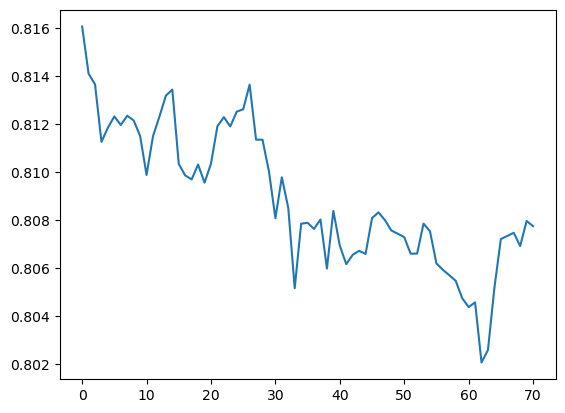

In [6]:
plt.plot(df_erho.loc[418].rho[30:])

df_erho.loc[418].rho[:10] * 94933, 94933*0.65, 94933*0.92

# Read real data

In [9]:
realnet_path = Path('../../../triad-statistics/results_realnet2.h5')
results_realnet = pd.read_hdf(realnet_path)
results_realnet

# wikielections

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,97.000000,15739.000000,22098.000000,0.000000


In [10]:
results_realnet.loc["tr0"]

wiki elections       0.012461
slashdot             0.012361
epinions             0.007489
sampson              0.108808
bitcoin-alpha        0.003380
bitcoin-otc          0.004742
Congress mentions    0.000000
Name: tr0, dtype: float64

In [11]:
results_realnet['wiki elections']

tr0            0.012461
tr1            0.027505
tr2            0.010724
tr3            0.072158
tr4            0.049625
tr5            0.065085
tr6            0.077725
tr7            0.684716
T         745129.000000
L_plus     75446.000000
L          94933.000000
rho            0.794729
Tr0         9285.000000
Tr1        20495.000000
Tr2         7991.000000
Tr3        53767.000000
Tr4        36977.000000
Tr5        48497.000000
Tr6        57915.000000
Tr7       510202.000000
Name: wiki elections, dtype: float64

In [12]:
pd.DataFrame(results_realnet['wiki elections']).transpose()

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
wiki elections,0.012461,0.027505,0.010724,0.072158,0.049625,0.065085,0.077725,0.684716,745129.0,75446.0,94933.0,0.794729,9285.0,20495.0,7991.0,53767.0,36977.0,48497.0,57915.0,510202.0


In [13]:
# epinions = pd.DataFrame()

# d = {}

# for i in range(8):
#     lab = "tr" + str(i)
#     d[lab] = results_realnet.loc[lab].epinions
#     # print(results_realnet.loc[lab].epinions)

# epinions = epinions.append(d, ignore_index=True)
# # epinions.rho = 0.794
# epinions = epinions.assign(rho=0.0)
# epinions

epinions = pd.DataFrame(results_realnet['epinions']).transpose()
epinions

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
epinions,0.007489,0.02701,0.004779,0.018902,0.02477,0.011846,0.029978,0.875227,10961993.0,583088.0,667110.0,0.874051,82094.0,296078.0,52385.0,207201.0,271534.0,129852.0,328616.0,9594233.0


# Error functions

That are used in finding parameters closest to real network stats. 

In [14]:

n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

# def normalize(data):
#     triads = ["tr" + str(i) for i in range(8)]
#     if data.shape[0] > 1:
#         if data.shape[1] > 1:
#             return data[triads].values.transpose() / np.sum(data[triads], axis=1).values
#     return ValueError("Not implemented")

def transform_data(data, triads = None, triads_groups = None):
    if triads_groups is None:
        T = len(triads)
        if data.shape[0] > 1:
            if data.shape[1] > 1:
                return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T
            else:
                return data[triads] / np.sum(data[triads]) - 1/T
        else:
            return data[triads] / np.sum(data[triads], axis=1).values[0] - 1/T
    else:
        if type(data) == pd.DataFrame:
            df = data.copy(deep=True)
            for triads in triads_groups:
                nn = transform_data(data, triads)
                
                if np.where(np.array(nn.shape) == 3)[0][0] == 0:
                    nn = nn.transpose()

                new_df = pd.DataFrame(nn, index = data.index, columns=triads)
                df.update(new_df)
            df = df.drop(columns=['tr0', 'tr7'])
            return df
        else:
            ValueError("Not implemented")

def closest_to_six_triads(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[deg_triads].transpose() - original_data[deg_triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[deg_triads].subtract(original_data[deg_triads].values)**2).sum(axis=1, min_count=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (original_data[triad] - model_data[triad])**2
    return err

def closest_to_six_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_six_triads(original_data, model_data)
    
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_six_triads(original_data_trans, model_data_trans)
    
    # model    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    # p1_m = pd.DataFrame(p1_m.transpose(), columns = n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    # p2_m = pd.DataFrame(p2_m.transpose(), columns = n1_triads)
    
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = np.sum((original_data[triads] - model_data[triads])**2, axis = 1).values[0]
    return err

def closest_to_four_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_four_triads(original_data, model_data)
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_four_triads(original_data_trans, model_data_trans)
    
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err

def closest_to_high_underrepresentation(original_data, model_data):
    triads = ["tr2"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    err += (original_data["tr2"] - model_data["tr2"])**2
    return err

def closest_to_high_underrepresentation_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_high_underrepresentation(original_data, model_data)
    
    # p1_r = transform_data(original_data, n1_triads)
    # p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    if any(np.isnan(p2_r[["tr2"]])):
        return np.nan
    
    err = 0
    err += np.sum((p2_r["tr2"] - p2_m["tr2"])**2)
    return err

def closest_to_rho(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == pd.DataFrame:
            err = model_data["rho"].subtract(original_data["rho"].values[0])**2
            return err
    
    err = 0
    err += (original_data["rho"] - model_data["rho"])**2
    return err

"""New error functions"""

"""Assuming we must have proper sign of deviations. """

def closest_to_six_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[deg_triads] * (original_data[deg_triads].values)  > 0, axis = 1) != 6
        return err
    
    raise ValueError("Not implemented")

    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        triads = ["tr1", "tr2", "tr5", "tr6"]
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[triads] * (original_data[triads].values)  > 0, axis = 1) != 4
        return err
    
    raise ValueError("Not implemented")
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err


"""Combination of triad densities and rho"""

def closest_to_six_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_six_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_six_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_four_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_four_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_six_triads_relative(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(ap.abs((model_data[deg_triads].transpose() - original_data[deg_triads].values)/ original_data[deg_triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_four_triads_relative(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]

    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[triads].transpose() - original_data[triads].values)/ original_data[triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[triads].subtract(original_data[triads].values) / original_data[triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    for triad in triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
                   closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]
error_functions.extend([closest_to_six_triads_corrdevs_transformed, closest_to_four_triads_corrdevs_transformed, 
                        closest_to_six_triads_rho, closest_to_six_triads_rho_transformed, closest_to_four_triads_rho, closest_to_four_triads_rho_transformed,
                        closest_to_six_triads_relative, closest_to_four_triads_relative])

# error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
#                    closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]

In [15]:
epinions_trans = transform_data(epinions, triads_groups=(n1_triads, n2_triads))

df_erho_trans = transform_data(df_erho, triads_groups = (n1_triads, n2_triads))

# datasets = []
# for error_fun in error_functions:
#     if error_fun.__name__.endswith("_transformed"):
#         datasets.append((wiki_trans, df_w1000_trans, True, 2))
#     else:
#         datasets.append((wiki, df_w1000))


/tmp/ipykernel_167433/1357367912.py:18: RuntimeWarning: invalid value encountered in true_divide
  return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T


# Finding simulations closest to real-world data results

In [16]:
n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Finding quasi-stationary level

In [18]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/qs_levels3.h5")
    df2_erho = pd.read_hdf(path, key = "df2_erho")
    # save_df2 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho = get_quasilevels2(df_erho)
    
    df2_erho.reset_index(drop = True, inplace = True)
    
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/qs_levels3.h5")
    df2_erho.to_hdf(path, key = 'df2_erho', mode ="w")
    
print(len(df2_erho))
df2_erho.head(5)
    

2867


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.1,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9003642577685839, 0.910299650732263, 0.9173...","[0.0010117685716456851, 0.0009675247922526496,...","[0.009039414639290502, 0.008582654632237039, 0...",...,0.010159,0.000726,0.966237,0.002870,0.966237,0.002870,0.967011,0.001865,0.966823,0.002122
1,1,0.1,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.799317953560882, 0.8260466789584926, 0.8410...","[0.008099804478984798, 0.006178347313303338, 0...","[0.032280717566595785, 0.027615781181396484, 0...",...,0.019410,0.000653,0.935877,0.002873,0.935877,0.002873,0.935557,0.002917,0.937623,0.001909
2,2,0.1,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.600610094287299, 0.6918694068444484, 0.7276...","[0.06386931646462464, 0.035355888295130276, 0....","[0.09626972029630014, 0.07338163780983988, 0.0...",...,0.038759,0.001558,0.878210,0.006188,0.878210,0.006188,0.882157,0.004693,0.873513,0.004917
3,3,0.1,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3997736505224026, 0.5924765031254215, 0.650...","[0.21809738429863987, 0.08556847281329226, 0.0...","[0.1441482401968328, 0.11075914753822594, 0.08...",...,0.051973,0.001712,0.835402,0.009781,0.835402,0.009781,0.852274,0.001992,0.826806,0.005853
4,4,0.1,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.1995982671523437, 0.5168068234623975, 0.590...","[0.5135383684335504, 0.1380434196591806, 0.077...","[0.12823480182846314, 0.13290010311081205, 0.1...",...,0.059118,0.001070,0.799251,0.003219,0.799251,0.003219,0.799785,0.003156,0.799785,0.003156


In [20]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000/qs_levels3.h5")
    df2_erho_s2000 = pd.read_hdf(path, key = "df2_erho")
    # save_df2_s2000 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho_s2000 = get_quasilevels2(df_erho_s2000)
    # save_df2_s2000 = True
    
    df2_erho_s2000.reset_index(drop = True, inplace = True)
    
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000/qs_levels3.h5")
    df2_erho_s2000.to_hdf(path, key = 'df2_erho', mode ="w")
print(len(df2_erho_s2000))
df2_erho_s2000.head(5)
    

341


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.1,1.0,0.1,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.39970469637690936, 0.8149795386068265, 0.88...","[0.21704164562046335, 0.0098890776522116, 0.00...","[0.14420242742355335, 0.03489338115797009, 0.0...",...,0.006821,0.000216,0.977743,0.000594,0.977743,0.000594,NaN,NaN,0.977736,0.000618
1,1,0.1,1.0,0.1,0.0,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[1.4990031628966737e-06, 0.6799163556235104, 0...","[0.9999994526542756, 0.049452138858326215, 0.0...","[1.8244857481664147e-07, 0.08674325918653661, ...",...,0.010797,0.000284,0.961067,0.000811,0.961067,0.000811,0.961045,0.000862,0.960872,0.000788
2,0,0.9,0.5,1.0,0.6,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.5999925049841855, 0.8644016728875298, 0.903...","[0.06449675711341907, 0.002114943879274508, 0....","[0.09635537990217655, 0.014655911566445991, 0....",...,0.002713,0.000078,0.993880,0.000186,0.993880,0.000186,NaN,NaN,0.993836,0.000221
3,1,0.9,0.5,1.0,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.4011362443974757, 0.7829503380252132, 0.847...","[0.21519855011766564, 0.010856146323027208, 0....","[0.14417989502456352, 0.04011770487355721, 0.0...",...,0.004068,0.000104,0.990722,0.000264,0.990722,0.000264,0.990735,0.000327,0.990716,0.000335
4,2,0.9,0.5,1.0,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.2004856770247785, 0.6823762198138238, 0.776...","[0.5100553339160133, 0.044450402404015404, 0.0...","[0.1280187827158802, 0.08901419659727934, 0.03...",...,0.005233,0.000071,0.987767,0.000190,0.987767,0.000190,NaN,NaN,0.987767,0.000190


In [22]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads2/qs_levels3.h5")
    df2_erho2 = pd.read_hdf(path, key = "df2_erho")
    # save_df2 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho2 = get_quasilevels2(df_erho2)
    # save_df2 = True
    
    df2_erho2.reset_index(drop = True, inplace = True)
    
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads2/qs_levels3.h5")
    df2_erho2.to_hdf(path, key = 'df2_erho')
print(len(df2_erho2))
df2_erho2.head(5)
    

252


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.95,0.1,0.8,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9004721859963124, 0.9367750445953441, 0.946...","[0.0010021900214678115, 0.00027476755367386206...","[0.00894435893181103, 0.003983490958259141, 0....",...,0.002608,0.000078,0.991721,0.000185,0.991721,0.000185,0.992353,0.000124,0.991756,0.000190
1,1,0.95,0.1,0.8,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.8001978684175024, 0.8732098154727106, 0.892...","[0.00796223825357305, 0.0018679997332601837, 0...","[0.03186966092753389, 0.013868098620387735, 0....",...,0.004283,0.000052,0.986677,0.000150,0.986677,0.000150,0.986659,0.000174,0.986659,0.000174
2,2,0.95,0.1,0.8,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.5999250498418551, 0.7491942857999431, 0.793...","[0.0637374061450322, 0.016180086960464215, 0.0...","[0.09573021986056733, 0.050231832842805135, 0....",...,NaN,NaN,0.977914,0.000176,0.977914,0.000176,NaN,NaN,NaN,NaN
3,3,0.95,0.1,0.8,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3985189848750581, 0.6196549294719012, 0.689...","[0.2174028025743129, 0.06975620217965839, 0.03...","[0.14398759422670676, 0.10509576132734258, 0.0...",...,NaN,NaN,0.971521,0.000382,0.971521,0.000382,NaN,NaN,NaN,NaN
4,4,0.95,0.1,0.8,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.19992804784818097, 0.470361709463207, 0.566...","[0.5138998902845495, 0.22840271837429563, 0.11...","[0.12803967307769673, 0.15587202071740056, 0.1...",...,NaN,NaN,0.962081,0.000102,0.962081,0.000102,NaN,NaN,NaN,NaN


In [24]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000-2/qs_levels3.h5")
    df2_erho_s2000_2 = pd.read_hdf(path, key = "df2_erho")
    # save_df2_s2000 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho_s2000_2 = get_quasilevels2(df_erho_s2000_2)
    # save_df2_s2000 = True
    
    df2_erho_s2000_2.reset_index(drop = True, inplace = True)
    
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000-2/qs_levels3.h5")
    df2_erho_s2000_2.to_hdf(path, key = 'df2_erho', mode ="w")
print(len(df2_erho_s2000_2))
df2_erho_s2000_2.head(5)
    

124


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.95,0.2,0.9,0.8,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.8006730524201406, 0.9171590892056782, 0.935...","[0.007921643445676347, 0.00038186486709123056,...","[0.031694783968572136, 0.004644775817682059, 0...",...,0.001714,0.000037,0.995668,0.000098,0.995668,0.000098,0.995669,0.000109,0.995628,0.000098
1,1,0.95,0.2,0.9,0.6,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.6011542324354304, 0.8321761028915771, 0.872...","[0.06379423887608758, 0.0035754447206817227, 0...","[0.09558635915932441, 0.020412437774773255, 0....",...,0.003244,0.000081,0.991744,0.000275,0.991744,0.000275,NaN,NaN,0.991704,0.000244
2,2,0.95,0.2,0.9,0.4,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.39957878011122605, 0.7401762827719567, 0.80...","[0.21767191422216745, 0.017122707522254393, 0....","[0.1441174976119762, 0.05216268611008965, 0.02...",...,NaN,NaN,0.989215,0.000292,0.989215,0.000292,NaN,NaN,NaN,NaN
3,3,0.95,0.2,0.9,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.1995577940669455, 0.6262190643222257, 0.719...","[0.5146597885986608, 0.070911831452547, 0.0195...","[0.12728853229517662, 0.10991158268391524, 0.0...",...,NaN,NaN,0.986014,0.000216,0.986014,0.000216,NaN,NaN,NaN,NaN
4,4,0.95,0.2,0.9,0.0,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.0, 0.4372127535189099, 0.5613871775269446, ...","[1.0, 0.36696182893019547, 0.14885313281991697...","[0.0, 0.17336208844504827, 0.16402957017031483...",...,NaN,NaN,0.977783,0.000496,0.977783,0.000496,NaN,NaN,NaN,NaN


In [25]:
try:
    path = Path(outputs_epi_rhoinits_replonger, "qs_levels3.h5")
    df2_erho_reps = pd.read_hdf(path, key = "df2_erho")
    # save_df2_s2000 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho_reps = get_quasilevels2(df_erho_reps)
    # save_df2_s2000 = True
    
    df2_erho_reps.reset_index(drop = True, inplace = True)
    
    path = Path(outputs_epi_rhoinits_replonger, "qs_levels3.h5")
    df2_erho_reps.to_hdf(path, key = 'df2_erho', mode ="w")
print(len(df2_erho_reps))
df2_erho_reps.head(5)
    

FileNotFoundError


/home/pgorski/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/pgorski/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/pgorski/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/pgorski/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/pgorski/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest on

288


/home/pgorski/.local/lib/python3.8/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['cur_steps', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6',
       'tr7', 'Lplus'],
      dtype='object')]

  pytables.to_hdf(


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6009908410906747, 0.7980183178186506, 0.841...","[0.06395944606058405, 0.008554192654565643, 0....","[0.09612312286643496, 0.03509681131889064, 0.0...",...,0.003397,0.000083,0.991257,0.000327,0.991257,0.000327,NaN,NaN,0.991137,0.000280
1,1,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.5997061953800723, 0.7984215496694698, 0.842...","[0.06437606738117786, 0.008784625204559061, 0....","[0.09647433637295699, 0.03530005903123638, 0.0...",...,0.003378,0.000083,0.991318,0.000217,0.991318,0.000217,0.991354,0.000193,0.991277,0.000211
2,2,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6001109262340544, 0.7990601250168637, 0.843...","[0.06417564762174177, 0.008715294746128737, 0....","[0.09597515707225866, 0.034984240548228775, 0....",...,0.003336,0.000058,0.991426,0.000215,0.991426,0.000215,0.991385,0.000171,0.991426,0.000215
3,3,0.925,0.1,1.0,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.6007704876257289, 0.7987153542893975, 0.843...","[0.06330153649979525, 0.008432773128025168, 0....","[0.09559566403664005, 0.03456086863036676, 0.0...",...,0.003193,0.000080,0.991710,0.000221,0.991710,0.000221,0.992001,0.000220,0.991736,0.000240
4,0,0.925,0.1,0.8,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.800260826550344, 0.8617559323050171, 0.8797...","[0.007938063817409845, 0.0022621798791515376, ...","[0.031867745217498314, 0.01586919458897666, 0....",...,0.005783,0.000168,0.981605,0.000587,0.981605,0.000587,0.981631,0.000586,0.981631,0.000586


In [19]:
#In the case of new simulations

if len(df2_erho) != len(df_erho):
    new_inds = []
    old_inds = []
    ind_map = {}

    for ind, row in df_erho.iterrows():
        q = row.q
        p = row.p
        ps = row.ps
        rho_init = row.rho_init
        
        ind_t = np.where((df2_erho.q == q) & (df2_erho.p == p) & (df2_erho.ps == ps) & (df2_erho.rho_init == rho_init))[0]
        
        if len(ind_t) > 0:
            if len(ind_t) > 1:
                minds = np.copy(ind_t)
                found = False
                for ind_ in minds:
                    if np.array_equal(row.rho, df2_erho.loc[ind_].rho):
                    # if np.all(row.rho == df2_joined.loc[ind_].rho):
                        ind_t = ind_
                        found = True
                        break
                if not found:
                    print((ind, ind_t))
            else:
                ind_t = ind_t[0]
            old_inds.append(ind)
            ind_map[ind] = ind_t
        else:
            new_inds.append(ind)
    
    print(len(new_inds))
    print(len(old_inds))

In [20]:
if len(df2_erho) != len(df_erho):
    df_temp = df_erho.loc[new_inds].copy(deep=True)
    df_temp.index.name = "level_1"
    df_temp.reset_index(inplace=True)
    
    df2_temp = get_quasilevels(df_temp)
    
    len(df2_temp)
    df2_temp.head()

In [21]:
if len(df2_erho) != len(df_erho):
    df2_erho = pd.concat([df2_erho, df2_temp])
    print(len(df2_erho) )
    save_df2 = True

In [26]:
df2_erho = pd.concat([df2_erho, df2_erho_s2000, df2_erho2, df2_erho_s2000_2, df2_erho_reps])
df2_erho.reset_index(drop = True, inplace = True)
save_df2 = True

### Correcting numerical errors in parameter values

It happens that ps is 0.7 or 0.700000001 etc. It causes problems in later `group` method. 

In [27]:
for ind, row in df2_erho.iterrows():
    q = round(row.q, 5)
    psbt = round(row.p, 5)
    pst = round(row.ps, 5)
    rho_init = round(row.rho_init, 5)
    
    df2_erho.at[ind, "q"] = q
    df2_erho.at[ind, "p"] = psbt
    df2_erho.at[ind, "ps"] = pst
    df2_erho.at[ind, "rho_init"] = rho_init


In [28]:
if save_df2:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/qs_levels_all.h5")
    df2_erho.to_hdf(path, key = 'df2_erho', mode ="w")
    save_df2 = False

/home/pgorski/.local/lib/python3.8/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['cur_steps', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6',
       'tr7', 'Lplus'],
      dtype='object')]

  pytables.to_hdf(


In [29]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/qs_levels_all.h5")
    df2_erho = pd.read_hdf(path, key = "df2_erho")
    
    df2_erho.drop(columns = ["index"], inplace = True)
except FileNotFoundError:
    print("FileNotFoundError")
    
print(len(df2_erho))
df2_erho.head(5)
    


3872


,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0.1,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9003642577685839, 0.910299650732263, 0.9173...","[0.0010117685716456851, 0.0009675247922526496,...","[0.009039414639290502, 0.008582654632237039, 0...","[0.009028832621951135, 0.0081996038494095, 0.0...",...,0.010159,0.000726,0.966237,0.002870,0.966237,0.002870,0.967011,0.001865,0.966823,0.002122
1,0.1,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.799317953560882, 0.8260466789584926, 0.8410...","[0.008099804478984798, 0.006178347313303338, 0...","[0.032280717566595785, 0.027615781181396484, 0...","[0.032125545053714226, 0.026947563276130536, 0...",...,0.019410,0.000653,0.935877,0.002873,0.935877,0.002873,0.935557,0.002917,0.937623,0.001909
2,0.1,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.600610094287299, 0.6918694068444484, 0.7276...","[0.06386931646462464, 0.035355888295130276, 0....","[0.09626972029630014, 0.07338163780983988, 0.0...","[0.09591066150106098, 0.07139413426007479, 0.0...",...,0.038759,0.001558,0.878210,0.006188,0.878210,0.006188,0.882157,0.004693,0.873513,0.004917
3,0.1,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3997736505224026, 0.5924765031254215, 0.650...","[0.21809738429863987, 0.08556847281329226, 0.0...","[0.1441482401968328, 0.11075914753822594, 0.08...","[0.14412443065781924, 0.10501566640299807, 0.0...",...,0.051973,0.001712,0.835402,0.009781,0.835402,0.009781,0.852274,0.001992,0.826806,0.005853
4,0.1,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.1995982671523437, 0.5168068234623975, 0.590...","[0.5135383684335504, 0.1380434196591806, 0.077...","[0.12823480182846314, 0.13290010311081205, 0.1...","[0.12795082062176102, 0.11982811884663674, 0.0...",...,0.059118,0.001070,0.799251,0.003219,0.799251,0.003219,0.799785,0.003156,0.799785,0.003156


In [30]:
np.unique(df2_erho.steps)

array([1000, 2000])

In [12]:
chosen_cols = ['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs2_m', 'rho_qs2_s',
       'rho_qs2_b', 'rho_qs2_f']

df2_erho[['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs3_m', 'rho_qs3_s',
       'rho_qs3_b', 'rho_qs3_f']]

,q,p,ps,rho_qs_m,rho_qs_s,rho_qs_b,rho_qs_f,rho_qs3_m,rho_qs3_s,rho_qs3_b,rho_qs3_f
0,0.100,0.8,0.0,0.968992,0.000790,51.0,100.0,0.969164,0.000653,56.0,101.0
1,0.100,0.8,0.0,0.945804,0.000792,51.0,101.0,0.945385,0.000745,75.0,101.0
2,0.100,0.8,0.0,0.913360,0.002050,61.0,101.0,0.915020,0.000841,81.0,101.0
3,0.100,0.8,0.0,0.875701,0.001923,50.0,89.0,0.880373,0.001127,93.0,101.0
4,0.100,0.8,0.0,0.848482,0.001655,79.0,101.0,0.848910,0.001494,83.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...
3455,0.950,0.2,0.9,0.918546,0.000034,85.0,87.0,NaN,NaN,NaN,NaN
3456,0.950,0.2,0.9,0.937090,0.000004,88.0,90.0,NaN,NaN,NaN,NaN
3457,0.950,0.2,0.9,0.955476,0.000035,91.0,93.0,NaN,NaN,NaN,NaN
3458,0.950,0.2,0.9,0.975229,0.000012,89.0,92.0,NaN,NaN,NaN,NaN


In [31]:
df2_erho.reset_index(inplace=True, drop=True)
# df2_erho.drop(columns="index", inplace=True)

len(df2_erho.index.values), len(np.unique(df2_erho.index.values))

(3872, 3872)

In [32]:
inds = [row.cur_steps[-1] == row.steps for ind,row in df2_erho.iterrows()]

df2_erho_correct = df2_erho.iloc[inds]
df2_erho_correct.reset_index(drop = True, inplace = True)

In [33]:
# df2_erho_g = group_quasilevels2(df2_erho, cols = ['q', 'p', 'ps', 'rho_init'])
# df2_erho_g

In [34]:
df2_erho_correct_g = group_quasilevels2(df2_erho_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_erho_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.0 0.8 0.5 0.0              1     0.001138  0.862470  ...      0.000250   
            0.2              1     0.000905  0.883255  ...      0.000128   
            0.4              1     0.000532  0.909530  ...      0.000129   
            0.6              1     0.000566  0.935162  ...      0.000312   
            0.8              1     0.000510  0.962786  ...      0.000317   
...                        ...          ...       ...  ...           ...   
1.0 0.5 1.0 0.0              0          NaN       NaN  ...           NaN   
            0.2              1     0.000049       NaN  ...           NaN   
            0.4              1     0.000023       NaN  ...           NaN   
            0.6              1     0.000020       NaN  ...           NaN   
            0.8              1     0.000008       NaN  ...           NaN   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.0 0.8 0.5 0.0  0.022820           0.0      0.000672  0.023352           0.0   
            0.2  0.020397           0.0      0.000808  0.020930           0.0   
            0.4  0.017458           0.0      0.000588  0.017824           0.0   
            0.6  0.014434           0.0      0.000533  0.014595           0.0   
            0.8  0.006385           0.0      0.000509  0.006441           0.0   
...                   ...           ...           ...       ...           ...   
1.0 0.5 1.0 0.0       NaN           NaN           NaN       NaN           NaN   
            0.2       NaN           NaN           NaN       NaN           NaN   
            0.4       NaN           NaN           NaN       NaN           NaN   
            0.6       NaN           NaN           NaN       NaN           NaN   
            0.8       NaN           NaN           NaN       NaN           NaN   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.0 0.8 0.5 0.0      0.000652  0.916444           0.0      0.002163  
            0.2      0.000765  0.926495           0.0      0.002520  
            0.4      0.000601  0.939682           0.0      0.001769  
            0.6      0.000518  0.952116           0.0      0.001801  
            0.8      0.000529  0.977722           0.0      0.001694  
...                       ...       ...           ...           ...  
1.0 0.5 1.0 0.0           NaN       NaN           NaN           NaN  
            0.2           NaN       NaN           NaN           NaN  
            0.4           NaN       NaN           NaN           NaN  
            0.6           NaN       NaN           NaN           NaN  
            0.8           NaN       NaN           NaN           NaN  

[1966 rows x 94 columns]

In [17]:
i = 0
qf = 0.9
psbtf = 1.
pstf = 0.9

In [18]:
cols = ['q', 'p', 'ps', 'rho_init']
inds = []
i=0
for group in df2_erho_correct.groupby(cols):
    (group_label, df_temp) = group
    q, psb, ps, _ = group_label
    if ((np.abs(q - qf) < 1e-5) & (np.abs(psb - psbtf) < 1e-5) & (np.abs(ps - pstf) < 1e-5)):
        inds.append(i)
    i += 1
q, psb, ps  , i, inds

(1.0, 0.5, 1.0, 1966, [1833, 1834])

In [16]:
print(len(df2_erho_correct.index))
q = 0.9
psbt = 1.
pst = 0.9
inds = np.where((np.abs(df2_erho_correct.q - q) < 1e-5) & (np.abs(df2_erho_correct.p - psbt) < 1e-5) & (np.abs(df2_erho_correct.ps - pst) < 1e-5))[0]
df2_erho_correct.iloc[inds]
# df2_erho_correct

2430


,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
1298,0.9,1.0,0.9,0.0,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.3889703347274063, 0.5294434201256165, ...","[1.0, 0.4772737950115458, 0.23364556062022662,...","[0.0, 0.15059487813940403, 0.17247474980142755...","[0.0, 0.08719919817500339, 0.07447049090434558...",...,NaN,NaN,0.979584,0.000191,0.979584,0.000191,NaN,NaN,NaN,NaN
1299,0.9,1.0,0.9,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.19995053289562442, 0.572841060694638, 0.687...","[0.5142550264354301, 0.1476214224913298, 0.049...","[0.1278881495363115, 0.14159733544803393, 0.09...","[0.12770515361577042, 0.09569500728562771, 0.0...",...,NaN,NaN,0.987428,0.000375,0.987428,0.000375,NaN,NaN,NaN,NaN
1823,0.9,1.0,0.9,0.2,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.19985759469952483, 0.6880919188739488, 0.79...","[0.5158467078021305, 0.05029377413395539, 0.01...","[0.12760599281535756, 0.093577782799168, 0.038...","[0.12713180896940912, 0.04489968201950138, 0.0...",...,0.004772,0.000067,0.989315,0.000269,0.989315,0.000269,0.989348,0.000268,0.989278,0.000240
1824,0.9,1.0,0.9,0.0,2000,"[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 2...","[0.0, 0.5281272953485932, 0.6703257333872974, ...","[1.0, 0.23681396257049242, 0.0659519669461566,...","[0.0, 0.17288589766477683, 0.12137172501387293...","[0.0, 0.07352932993115394, 0.02854909686587101...",...,0.005836,0.000123,0.981567,0.000324,0.981567,0.000324,0.981573,0.000314,0.981600,0.000309


In [35]:
inds = np.isnan(df2_erho_correct_g.rho_lvl3)
df2_erho_correct_g.loc[inds]
# inds

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.9 0.5 0.0  0.0  0.9  0.5       0.0            1  0.878589      0.00000   
            0.2  0.0  0.9  0.5       0.2            1  0.901475      0.00000   
    1.0 0.5 0.6  0.0  1.0  0.5       0.6            1  0.955583      0.00000   
0.1 1.0 0.1 0.4  0.1  1.0  0.1       0.4            2  0.933797      0.00072   
0.2 0.8 0.3 0.2  0.2  0.8  0.3       0.2            1  0.841808      0.00000   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664      0.00000   
            0.4  1.0  0.5  1.0       0.4            1  0.903658      0.00000   
            0.6  1.0  0.5  1.0       0.6            1  0.941769      0.00000   
            0.8  1.0  0.5  1.0       0.8            1  0.973366      0.00000   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.0 0.9 0.5 0.0              1     0.000346  0.878589  ...      0.000429   
            0.2              1     0.000519  0.901475  ...      0.000109   
    1.0 0.5 0.6              1     0.000293  0.955583  ...      0.000053   
0.1 1.0 0.1 0.4              2     0.000140  0.933797  ...      0.000024   
0.2 0.8 0.3 0.2              1     0.001007  0.841808  ...      0.000312   
...                        ...          ...       ...  ...           ...   
1.0 0.5 1.0 0.0              0          NaN       NaN  ...           NaN   
            0.2              1     0.000049       NaN  ...           NaN   
            0.4              1     0.000023       NaN  ...           NaN   
            0.6              1     0.000020       NaN  ...           NaN   
            0.8              1     0.000008       NaN  ...           NaN   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.0 0.9 0.5 0.0  0.008486      0.000000      0.000260  0.009333      0.000000   
            0.2  0.008992      0.000000      0.000316  0.009792      0.000000   
    1.0 0.5 0.6  0.003814      0.000000      0.000189  0.004313      0.000000   
0.1 1.0 0.1 0.4  0.006196      0.000043      0.000140  0.006903      0.000082   
0.2 0.8 0.3 0.2  0.059085      0.000000      0.001313  0.059848      0.000000   
...                   ...           ...           ...       ...           ...   
1.0 0.5 1.0 0.0       NaN           NaN           NaN       NaN           NaN   
            0.2       NaN           NaN           NaN       NaN           NaN   
            0.4       NaN           NaN           NaN       NaN           NaN   
            0.6       NaN           NaN           NaN       NaN           NaN   
            0.8       NaN           NaN           NaN       NaN           NaN   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.0 0.9 0.5 0.0      0.000263  0.960329      0.000000      0.000921  
            0.2      0.000290  0.964050      0.000000      0.000839  
    1.0 0.5 0.6      0.000191  0.985491      0.000000      0.000568  
0.1 1.0 0.1 0.4      0.000131  0.977588      0.000148      0.000399  
0.2 0.8 0.3 0.2      0.001227  0.797889      0.000000      0.004368  
...                       ...       ...           ...           ...  
1.0 0.5 1.0 0.0           NaN       NaN           NaN           NaN  
            0.2           NaN       NaN           NaN           NaN  
            0.4           NaN       NaN           NaN           NaN  
            0.6           NaN       NaN           NaN           NaN  
            0.8           NaN       NaN           NaN           NaN  

[300 rows x 94 columns]

In [36]:
q = 0.95
inds = np.isnan(df2_erho_correct_g.rho_lvl3) & (np.abs(df2_erho_correct_g.q - q) < 1e-5)
df2_erho_correct_g.loc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  \
0.95 0.0 0.9 0.0  0.95  0.0  0.9       0.0            2  0.870176   
             0.2  0.95  0.0  0.9       0.2            2  0.890495   
         1.0 0.0  0.95  0.0  1.0       0.0            2  0.883509   
             0.2  0.95  0.0  1.0       0.2            2  0.904201   
     0.1 0.8 0.0  0.95  0.1  0.8       0.0            2  0.876481   
             0.2  0.95  0.1  0.8       0.2            2  0.899619   
         0.9 0.0  0.95  0.1  0.9       0.0            2  0.892700   
             0.2  0.95  0.1  0.9       0.2            2  0.916796   
         1.0 0.0  0.95  0.1  1.0       0.0            2  0.901320   
             0.2  0.95  0.1  1.0       0.2            2  0.925591   
             0.4  0.95  0.1  1.0       0.4            6  0.944383   
     0.2 0.8 0.0  0.95  0.2  0.8       0.0            2  0.888125   
             0.2  0.95  0.2  0.8       0.2            2  0.911250   
         0.9 0.0  0.95  0.2  0.9       0.0            2  0.900105   
             0.2  0.95  0.2  0.9       0.2            2  0.923547   
         1.0 0.0  0.95  0.2  1.0       0.0            2  0.906028   
             0.2  0.95  0.2  1.0       0.2            2  0.930303   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.95 0.0 0.9 0.0     0.004917              2     0.000026  0.870176  ...   
             0.2     0.004089              2     0.000151  0.890495  ...   
         1.0 0.0     0.004727              2     0.000062  0.883509  ...   
             0.2     0.003544              2     0.000049  0.904201  ...   
     0.1 0.8 0.0     0.008048              2     0.000077  0.876481  ...   
             0.2     0.005426              2     0.000120  0.899619  ...   
         0.9 0.0     0.006804              2     0.000051  0.892700  ...   
             0.2     0.004414              2     0.000062  0.916796  ...   
         1.0 0.0     0.005519              2     0.000054  0.901320  ...   
             0.2     0.004045              2     0.000044  0.925591  ...   
             0.4     0.002099              6     0.000019  0.944383  ...   
     0.2 0.8 0.0     0.007118              2     0.000045  0.888125  ...   
             0.2     0.006094              2     0.000040  0.911250  ...   
         0.9 0.0     0.004922              2     0.000022  0.900105  ...   
             0.2     0.005002              2     0.000087  0.923547  ...   
         1.0 0.0     0.004440              2     0.000041  0.906028  ...   
             0.2     0.002845              2     0.000052  0.930303  ...   

                  tr4_sim_std4  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  \
0.95 0.0 0.9 0.0           NaN       NaN           NaN           NaN   
             0.2      0.000015  0.003852      0.000000      0.000132   
         1.0 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   
     0.1 0.8 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   
         0.9 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   
         1.0 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   
             0.4      0.000001  0.001518      0.000051      0.000020   
     0.2 0.8 0.0           NaN       NaN           NaN           NaN   
             0.2      0.000019  0.003861      0.000000      0.000107   
         0.9 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   
         1.0 0.0           NaN       NaN           NaN           NaN   
             0.2           NaN       NaN           NaN           NaN   

                  tr6_lvl4  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  \
0.95 0.0 0.9 0.0       NaN           NaN    

In [ ]:
inds_to_repeat_longer = [1,2, 3, 4, 5, ]

In [19]:
q = 0.95
p = 0.
ps = 1.
rho_init = 0.9

ind_t = np.where( (np.abs(df2_erho_correct_g.q - q) < 1e-5) & (np.abs(df2_erho_correct_g.p - p ) < 1e-5) & 
                 (np.abs(df2_erho_correct_g.rho_init - rho_init) < 1e-5) & (np.abs(df2_erho_correct_g.ps - ps) < 1e-5))


df2_erho_correct_g.iloc[ind_t]

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_sim_std,rho_lvl2,...,tr4_sim_std4,tr5_lvl4,tr5_lvl4_std,tr5_sim_std4,tr6_lvl4,tr6_lvl4_std,tr6_sim_std4,tr7_lvl4,tr7_lvl4_std,tr7_sim_std4
0.95,0.0,1.0,0.9,0.95,0.0,1.0,0.9,2,0.977351,0.00067,2,0.000422,0.977351,...,0.000008,0.000658,0.000057,0.000157,0.001713,0.000009,0.000183,0.995119,0.000038,0.000467


In [50]:
df2_erho_correct.iloc[ind_t[1]].rho == df2_erho_correct.iloc[ind_t[5]].rho

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [97]:
q = 0.95
p = 0.1
ps = 1.
rho_init = 0.9

ind_t = np.where( (np.abs(df2_erho_correct.q - q) < 1e-5) & (np.abs(df2_erho_correct.p - p ) < 1e-5) & 
                 (np.abs(df2_erho_correct.rho_init - rho_init) < 1e-5) & (np.abs(df2_erho_correct.ps - ps) < 1e-5))[0]


# df_one = df102.iloc[0].rho
df_one = df2_erho_correct.iloc[ind_t[0]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
print(df2_erho_correct[["rho_qs3_m", "rho_qs4_m"]].iloc[ind_t[0]])
plt.plot(df_one[30:])
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

IndexError: index 0 is out of bounds for axis 0 with size 0

Text(0.5, 1.0, 'q, psbt, pst = 0.85, 0.0, 0.8')

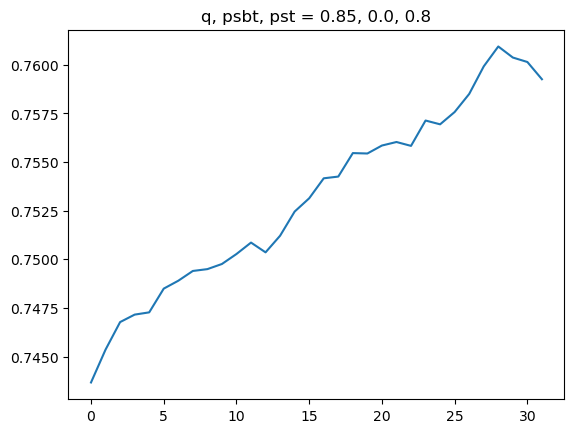

In [50]:
q = 0.85
p = 0.0
ps = 0.8
rho_init = 0.6

ind_t = np.where( (np.abs(df2_erho.q - q) < 1e-5) & (np.abs(df2_erho.p - p ) < 1e-5) & 
                 (np.abs(df2_erho.rho_init - rho_init) < 1e-5) & (np.abs(df2_erho.ps - ps) < 1e-5))[0]


# df_one = df102.iloc[0].rho
df_one = df2_erho.iloc[ind_t[0]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
df_one
plt.plot(df_one[30:])
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

In [34]:
inds = [row.cur_steps[-1] == row.steps for ind,row in df2_erho_s2000.iterrows()]

df2_erho_s2000_correct = df2_erho_s2000.iloc[inds]
print(len(df2_erho_s2000_correct.index))

df2_erho_s2000_correct_g = group_quasilevels(df2_erho_s2000_correct, cols = ['q', 'p', 'ps', 'rho_init'])
print(len(df2_erho_s2000_correct_g.index))

inds_s2000 = np.isnan(df2_erho_s2000_correct_g.rho_lvl3)
df2_erho_s2000_correct_g.loc[inds_s2000]

340


/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


340


q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 1.0 0.1 0.4  0.1  1.0  0.1       0.4            1  0.934517          0.0   
        0.3 0.0  0.1  1.0  0.3       0.0            1  0.893372          0.0   
0.5 1.0 0.1 0.4  0.5  1.0  0.1       0.4            1  0.876366          0.0   
        0.9 0.0  0.5  1.0  0.9       0.0            1  0.911230          0.0   
0.7 0.5 0.9 0.0  0.7  0.5  0.9       0.0            1  0.891132          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
0.9 0.9 0.9 0.0  0.9  0.9  0.9       0.0            1  0.917420          0.0   
        1.0 0.2  0.9  0.9  1.0       0.2            1  0.941638          0.0   
    1.0 0.7 0.2  0.9  1.0  0.7       0.2            1  0.931112          0.0   
        0.8 0.0  0.9  1.0  0.8       0.0            1  0.914531          0.0   
        1.0 0.0  0.9  1.0  1.0       0.0            1  0.920647          0.0   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr3_lvl3  \
0.1 1.0 0.1 0.4              1  0.934517           0.0  ...  0.004108   
        0.3 0.0              1  0.893372           0.0  ...  0.006035   
0.5 1.0 0.1 0.4              1  0.876366           0.0  ...  0.043674   
        0.9 0.0              1  0.911230           0.0  ...  0.005516   
0.7 0.5 0.9 0.0              1  0.891132           0.0  ...  0.017325   
...                        ...       ...           ...  ...       ...   
0.9 0.9 0.9 0.0              1  0.917420           0.0  ...  0.002490   
        1.0 0.2              1  0.941638           0.0  ...  0.001401   
    1.0 0.7 0.2              1  0.931112           0.0  ...       NaN   
        0.8 0.0              1  0.914531           0.0  ...  0.003281   
        1.0 0.0              1  0.920647           0.0  ...  0.001608   

                 tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  tr5_lvl3_std  \
0.1 1.0 0.1 0.4           0.0  0.003883           0.0  0.006106           0.0   
        0.3 0.0           0.0  0.009092           0.0  0.009476           0.0   
0.5 1.0 0.1 0.4           0.0  0.006984           0.0  0.042451           0.0   
        0.9 0.0           0.0  0.005044           0.0  0.007684           0.0   
0.7 0.5 0.9 0.0           0.0  0.004587           0.0  0.016761           0.0   
...                       ...       ...           ...       ...           ...   
0.9 0.9 0.9 0.0           0.0  0.006715           0.0  0.002763           0.0   
        1.0 0.2           0.0  0.001859           0.0  0.001778           0.0   
    1.0 0.7 0.2           NaN  0.002151           0.0  0.003933           0.0   
        0.8 0.0           0.0       NaN           NaN  0.003506           0.0   
        1.0 0.0           0.0  0.007493           0.0  0.002021           0.0   

                 tr6_lvl3  tr6_lvl3_std  tr7_lvl3  tr7_lvl3_std  
0.1 1.0 0.1 0.4  0.006806           0.0  0.977760           0.0  
        0.3 0.0  0.010506           0.0  0.962562           0.0  
0.5 1.0 0.1 0.4  0.041748           0.0  0.853837           0.0  
        0.9 0.0  0.009661           0.0  0.971003           0.0  
0.7 0.5 0.9 0.0  0.019028           0.0  0.939278           0.0  
...                   ...           ...       ...           ...  
0.9 0.9 0.9 0.0  0.006056           0.0  0.981463           0.0  
        1.0 0.2  0.004621           0.0  0.990035           0.0  
    1.0 0.7 0.2  0.006621           0.0  0.982436           0.0  
        0.8 0.0  0.006746           0.0  0.979376           0.0  
        1.0 0.0  0.005382           0.0  0.983296           0.0  

[64 rows x 48 columns]

In [125]:
df2_erho_s2000_correct_g["rho_lvl3"]

0.1  0.7  1.0  0.9    0.829680
     0.8  0.0  0.6    0.914464
          0.2  0.9    0.973795
          0.3  0.2    0.878382
          0.4  0.2    0.884287
                        ...   
0.9  1.0  0.9  0.0    0.917455
               0.2    0.939883
          1.0  0.0         NaN
               0.2    0.942071
               0.4    0.958057
Name: rho_lvl3, Length: 340, dtype: float64

In [38]:
df2_erho_s2000_g = group_quasilevels(df2_erho_s2000, cols = ['q', 'p', 'ps', 'rho_init'])
print(len(df2_erho_s2000_g.index))
df2_erho_s2000_g

341


q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 1.0 0.9  0.1  0.7  1.0       0.9            1  0.830373          0.0   
    0.8 0.0 0.6  0.1  0.8  0.0       0.6            1  0.914877          0.0   
        0.2 0.9  0.1  0.8  0.2       0.9            1  0.973795          0.0   
        0.3 0.2  0.1  0.8  0.3       0.2            1  0.878363          0.0   
        0.4 0.2  0.1  0.8  0.4       0.2            1  0.884076          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
0.9 1.0 0.9 0.0  0.9  1.0  0.9       0.0            1  0.917403          0.0   
            0.2  0.9  1.0  0.9       0.2            1  0.939793          0.0   
        1.0 0.0  0.9  1.0  1.0       0.0            1  0.920647          0.0   
            0.2  0.9  1.0  1.0       0.2            1  0.942013          0.0   
            0.4  0.9  1.0  1.0       0.4            1  0.957921          0.0   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  tr3_lvl3  \
0.1 0.7 1.0 0.9              1       NaN           NaN  ...  0.117998   
    0.8 0.0 0.6              1  0.914877           0.0  ...  0.029312   
        0.2 0.9              1  0.973795           0.0  ...  0.006523   
        0.3 0.2              1  0.878363           0.0  ...  0.030193   
        0.4 0.2              1  0.884076           0.0  ...  0.025194   
...                        ...       ...           ...  ...       ...   
0.9 1.0 0.9 0.0              1  0.917403           0.0  ...  0.002218   
            0.2              1  0.939793           0.0  ...  0.001634   
        1.0 0.0              1  0.920647           0.0  ...  0.001608   
            0.2              1  0.942013           0.0  ...  0.001365   
            0.4              1  0.957921           0.0  ...  0.000980   

                 tr3_lvl3_std  tr4_lvl3  tr4_lvl3_std  tr5_lvl3  tr5_lvl3_std  \
0.1 0.7 1.0 0.9           0.0  0.028202           0.0  0.115599           0.0   
    0.8 0.0 0.6           0.0  0.004595           0.0  0.030413           0.0   
        0.2 0.9           0.0  0.001078           0.0  0.006984           0.0   
        0.3 0.2           0.0  0.007696           0.0  0.032915           0.0   
        0.4 0.2           0.0  0.006934           0.0  0.027602           0.0   
...                       ...       ...           ...       ...           ...   
0.9 1.0 0.9 0.0           0.0  0.007392           0.0  0.002572           0.0   
            0.2           0.0  0.001929           0.0  0.001972           0.0   
        1.0 0.0           0.0  0.007493           0.0  0.002021           0.0   
            0.2           0.0  0.001900           0.0  0.001706           0.0   
            0.4           0.0  0.000998           0.0  0.001193           0.0   

                 tr6_lvl3  tr6_lvl3_std  tr7_lvl3  tr7_lvl3_std  
0.1 0.7 1.0 0.9  0.116387           0.0  0.559753           0.0  
    0.8 0.0 0.6  0.030726           0.0  0.900282           0.0  
        0.2 0.9  0.006958           0.0  0.977491           0.0  
        0.3 0.2  0.033477           0.0  0.889650           0.0  
        0.4 0.2  0.028234           0.0  0.906984           0.0  
...                   ...           ...       ...           ...  
0.9 1.0 0.9 0.0  0.005866           0.0  0.981507           0.0  
            0.2  0.004813           0.0  0.989262           0.0  
        1.0 0.0  0.005382           0.0  0.983296           0.0  
            0.2  0.004525           0.0  0.990247           0.0  
            0.4  0.003384           0.0  0.993292           0.0  

[341 rows x 48 columns]

In [44]:
q = 0.95
inds = np.isnan(df2_erho_s2000_correct_g.rho_lvl3) & (np.abs(df2_erho_s2000_correct_g.q - q) < 1e-5)
df2_erho_s2000_correct_g.loc[inds]

NameError: name 'df2_erho_s2000_correct_g' is not defined

Text(0.5, 1.0, 'q, psbt, pst = 0.9, 1.0, 0.8')

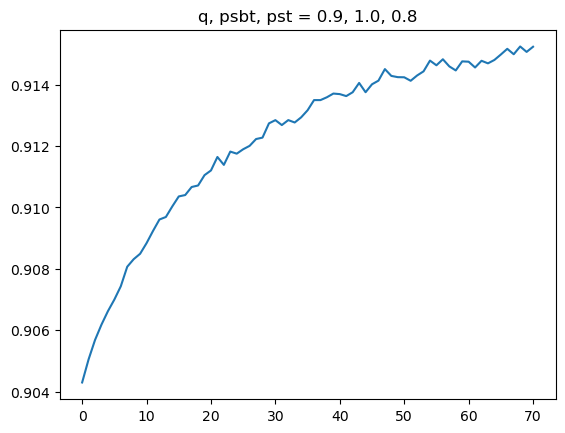

In [128]:
q = 0.9
p = 1.0
ps = 0.8
rho_init = 0.

ind_t = np.where( (np.abs(df2_erho_s2000_correct.q - q) < 1e-5) & (np.abs(df2_erho_s2000_correct.p - p ) < 1e-5) & (np.abs(df2_erho_s2000_correct.rho_init - rho_init) < 1e-5) & (np.abs(df2_erho_s2000_correct.ps - ps) < 1e-5))[0]


# df_one = df102.iloc[0].rho
df_one = df2_erho_s2000_correct.iloc[ind_t[0]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
df_one
plt.plot(df_one[30:])
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

Text(0.5, 1.0, 'q, psbt, pst = 0.9, 0.0, 0.8')

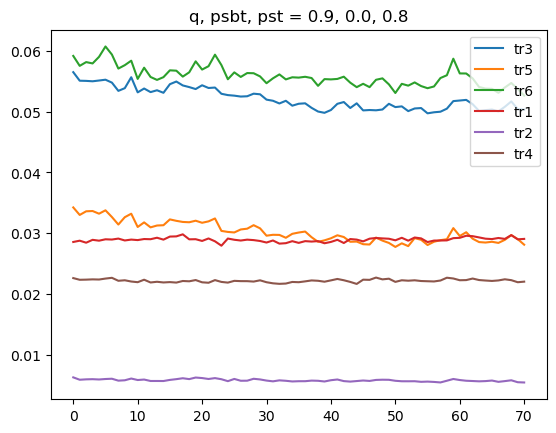

In [40]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df2_srho_correct.iloc[ind_t[0]][triad][30:])
    
plt.legend(deg_triads)
# plt.xscale('log')

plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

## Applying error functions to QS results

In [37]:
"""Adjusting col names"""

for col in df2_erho_correct_g.columns:
    if col.endswith("_lvl3"):
        new_col = col.split("_lvl3")[0]
        df2_erho_correct_g[new_col] = df2_erho_correct_g[col]


In [38]:
path = Path(outputs_epi_rhoinits, "qs_grouped_corr.h5")
df2_erho_correct_g.to_hdf(path, key = 'df2_srho_correct_g')

In [18]:
df2_erho_correct_g[["rho_lvl", "rho_lvl2", "rho_lvl3", "rho"]]

rho_lvl  rho_lvl2  rho_lvl3       rho
0.0 0.8 0.5 0.0  0.862470  0.862470  0.863538  0.863538
            0.2  0.883255  0.883255  0.884251  0.884251
            0.4  0.909530  0.909530  0.909620  0.909620
            0.6  0.935162  0.935162  0.935313  0.935313
            0.8  0.962786  0.962786  0.962863  0.962863
...                   ...       ...       ...       ...
1.0 0.5 1.0 0.0       NaN       NaN       NaN       NaN
            0.2  0.848664       NaN       NaN       NaN
            0.4  0.903658       NaN       NaN       NaN
            0.6  0.941769       NaN       NaN       NaN
            0.8  0.973366       NaN       NaN       NaN

[1966 rows x 4 columns]

In [39]:
df2_erho_correct_g_trans = transform_data(df2_erho_correct_g, triads_groups = (n1_triads, n2_triads))
df2_erho_correct_g_trans

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr7_lvl4  \
0.0 0.8 0.5 0.0              1     0.001138  0.862470  ...  0.916444   
            0.2              1     0.000905  0.883255  ...  0.926495   
            0.4              1     0.000532  0.909530  ...  0.939682   
            0.6              1     0.000566  0.935162  ...  0.952116   
            0.8              1     0.000510  0.962786  ...  0.977722   
...                        ...          ...       ...  ...       ...   
1.0 0.5 1.0 0.0              0          NaN       NaN  ...       NaN   
            0.2              1     0.000049       NaN  ...       NaN   
            0.4              1     0.000023       NaN  ...       NaN   
            0.6              1     0.000020       NaN  ...       NaN   
            0.8              1     0.000008       NaN  ...       NaN   

                 tr7_lvl4_std  tr7_sim_std4       rho       tr1       tr2  \
0.0 0.8 0.5 0.0           0.0      0.002163  0.863538 -0.257056 -0.149507   
            0.2           0.0      0.002520  0.884251 -0.244128 -0.148179   
            0.4           0.0      0.001769  0.909620 -0.226236 -0.134354   
            0.6           0.0      0.001801  0.935313 -0.204991 -0.126888   
            0.8           0.0      0.001694  0.962863 -0.208398 -0.157370   
...                       ...           ...       ...       ...       ...   
1.0 0.5 1.0 0.0           NaN           NaN       NaN       NaN       NaN   
            0.2           NaN           NaN       NaN       NaN       NaN   
            0.4           NaN           NaN       NaN       NaN       NaN   
            0.6           NaN           NaN       NaN       NaN       NaN   
            0.8           NaN           NaN       NaN       NaN       NaN   

                      tr3       tr4       tr5       tr6  
0.0 0.8 0.5 0.0 -0.037720  0.406563  0.014174  0.023546  
            0.2 -0.038458  0.392307  0.014444  0.024014  
            0.4 -0.035346  0.360590  0.013920  0.021426  
            0.6 -0.036239  0.331878  0.016129  0.020110  
            0.8 -0.037064  0.365768  0.016986  0.020078  
...                   ...       ...       ...       ...  
1.0 0.5 1.0 0.0       NaN       NaN       NaN       NaN  
            0.2       NaN       NaN       NaN       NaN  
            0.4       NaN       NaN       NaN       NaN  
            0.6       NaN       NaN       NaN       NaN  
            0.8       NaN       NaN       NaN       NaN  

[1966 rows x 101 columns]

In [40]:
# wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

# df_w1000_trans = transform_data(df_w1000, triads_groups = (n1_triads, n2_triads))

datasets = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets.append((epinions_trans, df2_erho_correct_g_trans, True, 2))
    else:
        datasets.append((epinions, df2_erho_correct_g))


In [41]:
closest_to_four_triads_transformed(epinions_trans, df2_erho_correct_g_trans, True)

0.0  0.8  0.5  0.0    0.212832
               0.2    0.202844
               0.4    0.192795
               0.6    0.180315
               0.8    0.176475
                        ...   
1.0  0.5  1.0  0.0         NaN
               0.2         NaN
               0.4         NaN
               0.6         NaN
               0.8         NaN
Length: 1966, dtype: float64

In [42]:

errs = {error_fun.__name__: np.zeros(len(df2_erho_correct_g)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_erho_correct_g[error_fun.__name__] = errs[error_fun.__name__]

df2_erho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.0 0.8 0.5 0.0              1     0.001138  0.862470  ...   
            0.2              1     0.000905  0.883255  ...   
            0.4              1     0.000532  0.909530  ...   
            0.6              1     0.000566  0.935162  ...   
            0.8              1     0.000510  0.962786  ...   
...                        ...          ...       ...  ...   
1.0 0.5 1.0 0.0              0          NaN       NaN  ...   
            0.2              1     0.000049       NaN  ...   
            0.4              1     0.000023       NaN  ...   
            0.6              1     0.000020       NaN  ...   
            0.8              1     0.000008       NaN  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.0 0.8 0.5 0.0               0.000977                           0.304242   
            0.2               0.001043                           0.285872   
            0.4               0.001197                           0.258488   
            0.6               0.001404                           0.232159   
            0.8               0.001968                           0.244895   
...                                ...                                ...   
1.0 0.5 1.0 0.0                    NaN                                NaN   
            0.2                    NaN                                NaN   
            0.4                    NaN                                NaN   
            0.6                    NaN                                NaN   
            0.8                    NaN                                NaN   

                 closest_to_six_triads_corrdevs_transformed  \
0.0 0.8 0.5 0.0                                    1.212832   
            0.2                                    1.202844   
            0.4                                    1.192795   
            0.6                                    1.180315   
            0.8                                    1.176475   
...                                                     ...   
1.0 0.5 1.0 0.0                                         NaN   
            0.2                                         NaN   
            0.4                                         NaN   
            0.6                                         NaN   
            0.8                                         NaN   

                 closest_to_four_triads_corrdevs_transformed  \
0.0 0.8 0.5 0.0                                     1.212832   
            0.2                                     1.202844   
            0.4                                     1.192795   
            0.6                                     1.180315   
            0.8                                     1.176475   
...                                                      ...   
1.0 0.5 1.0 0.0                                          NaN   
            0.2                                          NaN   
            0.4                                        

In [43]:
kmin = 3
inds_g = []
for error_fun in error_functions:
    arr = df2_erho_correct_g[error_fun.__name__]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_g.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_erho_correct_g.iloc[inds_g]
        

q    p   ps  rho_init  repetitions   rho_lvl  \
0.200 0.7 0.9 0.6  0.200  0.7  0.9       0.6            1  0.873329   
0.300 0.9 0.3 0.0  0.300  0.9  0.3       0.0            2  0.873187   
0.400 0.9 0.4 0.0  0.400  0.9  0.4       0.0            1  0.872512   
0.900 0.1 0.7 0.4  0.900  0.1  0.7       0.4            2  0.797768   
0.500 0.9 0.3 0.2  0.500  0.9  0.3       0.2            1  0.851205   
0.600 0.4 1.0 0.4  0.600  0.4  1.0       0.4            1  0.860322   
0.850 0.2 1.0 0.6  0.850  0.2  1.0       0.6            1  0.955155   
0.875 0.1 0.9 0.8  0.875  0.1  0.9       0.8            1  0.950518   
0.900 0.5 0.7 0.6  0.900  0.5  0.7       0.6            2  0.945223   
      0.0 0.8 0.2  0.900  0.0  0.8       0.2            2  0.835241   
              0.4  0.900  0.0  0.8       0.4            2  0.849755   
              0.6  0.900  0.0  0.8       0.6            2  0.863721   
0.950 0.1 1.0 0.8  0.950  0.1  1.0       0.8            6  0.978696   
          0.9 0.6  0.950  0.1  0.9       0.6            6  0.952475   
      0.2 0.9 0.6  0.950  0.2  0.9       0.6            6  0.958966   
0.000 0.8 0.5 0.0  0.000  0.8  0.5       0.0            1  0.862470   
              0.2  0.000  0.8  0.5       0.2            1  0.883255   
0.200 0.9 0.1 0.0  0.200  0.9  0.1       0.0            1  0.869616   
0.950 0.1 1.0 0.8  0.950  0.1  1.0       0.8            6  0.978696   
          0.9 0.6  0.950  0.1  0.9       0.6            6  0.952475   
0.925 0.1 1.0 0.8  0.925  0.1  1.0       0.8            6  0.977282   
0.950 0.2 0.9 0.6  0.950  0.2  0.9       0.6            6  0.958966   
      0.1 1.0 0.8  0.950  0.1  1.0       0.8            6  0.978696   
0.925 0.1 1.0 0.8  0.925  0.1  1.0       0.8            6  0.977282   
0.950 0.1 0.9 0.6  0.950  0.1  0.9       0.6            6  0.952475   
          1.0 0.8  0.950  0.1  1.0       0.8            6  0.978696   
      0.2 0.9 0.6  0.950  0.2  0.9       0.6            6  0.958966   
0.300 1.0 0.0 0.0  0.300  1.0  0.0       0.0            2  0.873225   
0.400 1.0 0.2 0.0  0.400  1.0  0.2       0.0            1  0.874531   
0.100 0.8 0.9 0.0  0.100  0.8  0.9       0.0            1  0.874638   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            6  0.908495   
      0.1 0.8 0.4  0.950  0.1  0.8       0.4            6  0.920111   
0.875 0.0 0.9 0.4  0.875  0.0  0.9       0.4            1  0.871634   
0.850 0.2 0.8 0.4  0.850  0.2  0.8       0.4            1  0.877226   
0.925 0.0 0.8 0.4  0.925  0.0  0.8       0.4            5  0.873123   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            6  0.908495   
0.925 0.0 0.9 0.2  0.925  0.0  0.9       0.2            2  0.883787   
0.000 0.8 0.5 0.2  0.000  0.8  0.5       0.2            1  0.883255   
              0.0  0.000  0.8  0.5       0.0            1  0.862470   
0.850 0.0 1.0 0.0  0.850  0.0  1.0       0.0            2  0.858531   
0.900 0.0 0.8 0.9  0.900  0.0  0.8       0.9            1  0.894412   
0.100 0.9 0.7 0.0  0.100  0.9  0.7       0.0            2  0.888723   
0.900 0.0 0.8 0.8  0.900  0.0  0.8       0.8            1  0.881345   

                   rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.200 0.7 0.9 0.6     0.000000              1     0.001269  0.873329  ...   
0.300 0.9 0.3 0.0     0.001384              2     0.000424  0.873187  ...   
0.400 0.9 0.4 0.0     0.000000              1     0.001438  0.872512  ...   
0.900 0.1 0.7 0.4     0.003074              2     0.000602  0.797768  ...   
0.500 0.9 0.3 0.2     0.000000              1     0.001348  0.851205  ...   
0.600 0.4 1.0 0.4     0.000000              1     0.001092  0.860322  ...   
0.850 0.2 1.0 0.6     0.000000              1     0.000064  0.955155  ...   
0.875 0.1 0.9 0.8     0.000000              1     0.000262  0.950518  ...   
0.900 0.5 0.7 0.6     0.002396              2     0.000145  0.9

In [44]:
df2_erho_correct_g.columns

non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']

In [103]:
cnt = 0
for ind,row in df2_erho_correct_g.iterrows():
    if row.q in [0.925]:
            
        if np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())):
            print(ind)
            cnt += 1
cnt

(0.925, 0.0, 0.8, 0.0)
(0.925, 0.0, 0.8, 0.2)
(0.925, 0.0, 0.8, 0.6)
(0.925, 0.0, 0.8, 0.9)
(0.925, 0.0, 0.9, 0.0)
(0.925, 0.0, 0.9, 0.2)
(0.925, 0.0, 0.9, 0.9)
(0.925, 0.0, 1.0, 0.0)
(0.925, 0.0, 1.0, 0.2)
(0.925, 0.0, 1.0, 0.4)
(0.925, 0.0, 1.0, 0.6)
(0.925, 0.1, 0.8, 0.0)
(0.925, 0.1, 0.8, 0.2)
(0.925, 0.1, 0.8, 0.4)
(0.925, 0.1, 0.9, 0.0)
(0.925, 0.1, 0.9, 0.2)
(0.925, 0.1, 0.9, 0.4)
(0.925, 0.1, 0.9, 0.6)
(0.925, 0.1, 0.9, 0.8)
(0.925, 0.1, 1.0, 0.0)
(0.925, 0.1, 1.0, 0.2)
(0.925, 0.1, 1.0, 0.4)
(0.925, 0.1, 1.0, 0.6)
(0.925, 0.1, 1.0, 0.8)
(0.925, 0.2, 0.8, 0.0)
(0.925, 0.2, 0.8, 0.2)
(0.925, 0.2, 0.8, 0.4)
(0.925, 0.2, 0.8, 0.6)
(0.925, 0.2, 0.8, 0.8)
(0.925, 0.2, 0.9, 0.0)
(0.925, 0.2, 0.9, 0.2)
(0.925, 0.2, 0.9, 0.4)
(0.925, 0.2, 0.9, 0.6)
(0.925, 0.2, 0.9, 0.8)
(0.925, 0.2, 1.0, 0.0)
(0.925, 0.2, 1.0, 0.2)
(0.925, 0.2, 1.0, 0.4)
(0.925, 0.2, 1.0, 0.6)


38

In [143]:
df2_erho_correct_g.columns

Index(['q', 'p', 'ps', 'rho_init', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
       'rho_lvl3', 'rho_lvl3_std', 'rho_lvl3_valid', 'rho_lvl_exp', 'tr_valid',
       'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl', 'tr1_lvl_std', 'tr2_lvl',
       'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std', 'tr4_lvl', 'tr4_lvl_std',
       'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl', 'tr6_lvl_std', 'tr7_lvl',
       'tr7_lvl_std', 'tr0_lvl3', 'tr0_lvl3_std', 'tr1_lvl3', 'tr1_lvl3_std',
       'tr2_lvl3', 'tr2_lvl3_std', 'tr3_lvl3', 'tr3_lvl3_std', 'tr4_lvl3',
       'tr4_lvl3_std', 'tr5_lvl3', 'tr5_lvl3_std', 'tr6_lvl3', 'tr6_lvl3_std',
       'tr7_lvl3', 'tr7_lvl3_std', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7', 'closest_to_rho',
       'closest_to_high_underrepresentation',
       'closest_to_high_underrepresentation_transformed',
       'closest_to_four_triads', 'closest_to_four_triads_transformed',
       'closest_to_six_triads'

In [109]:
"""Let us exclude rows that have nan in rho and rho in [0.65,0.92]"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']

emp_rho = epinions.rho.values[0]
kmin = 3
inds_g3 = []
for error_fun in error_functions:
    arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < emp_rho + 0.1) & (row.rho_lvl > emp_rho - 0.1) ) else 100 for ind,row in df2_erho_correct_g.iterrows()]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_g3.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_erho_correct_g.iloc[inds_g3]
        

q    p   ps  rho_init  repetitions   rho_lvl  \
0.300 0.9 0.3 0.0  0.300  0.9  0.3       0.0            2  0.873187   
0.200 0.7 0.9 0.6  0.200  0.7  0.9       0.6            1  0.873329   
0.400 0.9 0.4 0.0  0.400  0.9  0.4       0.0            1  0.872512   
0.500 0.9 0.3 0.2  0.500  0.9  0.3       0.2            1  0.851205   
0.900 0.1 0.7 0.4  0.900  0.1  0.7       0.4            2  0.797768   
0.600 0.4 1.0 0.4  0.600  0.4  1.0       0.4            1  0.860322   
0.875 0.1 0.9 0.8  0.875  0.1  0.9       0.8            1  0.950518   
0.850 0.2 1.0 0.6  0.850  0.2  1.0       0.6            1  0.955155   
0.900 0.5 0.7 0.6  0.900  0.5  0.7       0.6            2  0.945223   
      0.0 0.8 0.4  0.900  0.0  0.8       0.4            2  0.849755   
              0.2  0.900  0.0  0.8       0.2            2  0.835241   
              0.6  0.900  0.0  0.8       0.6            2  0.863721   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            2  0.907698   
          1.0 0.6  0.950  0.0  1.0       0.6            1  0.938481   
0.000 0.8 0.5 0.2  0.000  0.8  0.5       0.2            1  0.883255   
              0.0  0.000  0.8  0.5       0.0            1  0.862470   
0.200 0.9 0.1 0.0  0.200  0.9  0.1       0.0            1  0.869616   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            2  0.907698   
0.900 0.1 0.9 0.6  0.900  0.1  0.9       0.6            2  0.941342   
      0.5 0.8 0.6  0.900  0.5  0.8       0.6            2  0.958080   
      0.4 0.8 0.6  0.900  0.4  0.8       0.6            2  0.953525   
      0.7 0.7 0.6  0.900  0.7  0.7       0.6            2  0.955873   
0.950 0.0 0.9 0.4  0.950  0.0  0.9       0.4            2  0.907698   
          0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          1.0 0.6  0.950  0.0  1.0       0.6            1  0.938481   
0.300 1.0 0.0 0.0  0.300  1.0  0.0       0.0            2  0.873225   
0.400 1.0 0.2 0.0  0.400  1.0  0.2       0.0            1  0.874531   
0.100 0.8 0.9 0.0  0.100  0.8  0.9       0.0            1  0.874638   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            2  0.907698   
0.900 0.0 1.0 0.4  0.900  0.0  1.0       0.4            2  0.910250   
0.875 0.1 0.8 0.6  0.875  0.1  0.8       0.6            1  0.879197   
      0.0 0.9 0.4  0.875  0.0  0.9       0.4            1  0.871634   
0.850 0.2 0.8 0.4  0.850  0.2  0.8       0.4            1  0.877226   
0.950 0.0 0.8 0.2  0.950  0.0  0.8       0.2            2  0.871157   
          0.9 0.4  0.950  0.0  0.9       0.4            2  0.907698   
0.900 0.0 1.0 0.4  0.900  0.0  1.0       0.4            2  0.910250   
0.000 0.8 0.5 0.0  0.000  0.8  0.5       0.0            1  0.862470   
              0.2  0.000  0.8  0.5       0.2            1  0.883255   
0.850 0.0 1.0 0.0  0.850  0.0  1.0       0.0            2  0.858531   
0.900 0.0 0.8 0.9  0.900  0.0  0.8       0.9            1  0.894412   
0.925 0.0 0.8 0.4  0.925  0.0  0.8       0.4            1  0.869333   
0.100 0.9 0.7 0.0  0.100  0.9  0.7       0.0            2  0.888723   

                   rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.300 0.9 0.3 0.0     0.001384              2     0.006994  0.873187  ...   
0.200 0.7 0.9 0.6     0.000000              1     0.008976  0.873329  ...   
0.400 0.9 0.4 0.0     0.000000              1     0.008978  0.872512  ...   
0.500 0.9 0.3 0.2     0.000000              1     0.006871  0.851205  ...   
0.900 0.1 0.7 0.4     0.003074              2     0.009093  0.797768  ...   
0.600 0.4 1.0 0.4     0.000000              1     0.005566  0.860322  ...   
0.875 0.1 0.9 0.8     0.000000              1     0.001483  0.950518  ...   
0.850 0.2 1.0 0.6     0.000000              1     0.000142  0.955155  ...   
0.900 0.5 0.7 0.6     0.002396              2     0.001585  0.9

### Applying error functions to ungrouped results

In [45]:
"""Adjusting col names"""

for col in df2_erho_correct.columns:
    if col.endswith("_qs3_m"):
        new_col = col.split("_qs3_m")[0]
        df2_erho_correct[new_col] = df2_erho_correct[col]


/tmp/ipykernel_167433/508809682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_erho_correct[new_col] = df2_erho_correct[col]


In [46]:
df2_erho_correct_trans = transform_data(df2_erho_correct, triads_groups=(n1_triads, n2_triads))
df2_erho_correct_trans.head(5)

,q,p,ps,rho_init,steps,cur_steps,rho,tr1,tr2,tr3,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0.1,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.969164,-0.110925,-0.161868,-0.006954,...,0.010159,0.000726,0.966237,0.002870,0.966237,0.002870,0.967011,0.001865,0.966823,0.002122
1,0.1,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.945385,-0.083907,-0.106025,-0.008142,...,0.019410,0.000653,0.935877,0.002873,0.935877,0.002873,0.935557,0.002917,0.937623,0.001909
2,0.1,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.915020,-0.093948,-0.087716,-0.010252,...,0.038759,0.001558,0.878210,0.006188,0.878210,0.006188,0.882157,0.004693,0.873513,0.004917
3,0.1,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.880373,-0.096987,-0.080252,-0.009777,...,0.051973,0.001712,0.835402,0.009781,0.835402,0.009781,0.852274,0.001992,0.826806,0.005853
4,0.1,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.848910,-0.087629,-0.065492,-0.009154,...,0.059118,0.001070,0.799251,0.003219,0.799251,0.003219,0.799785,0.003156,0.799785,0.003156


In [47]:

datasets2 = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets2.append((epinions_trans, df2_erho_correct_trans, True, 2))
    else:
        datasets2.append((epinions, df2_erho_correct))


In [48]:

errs = {error_fun.__name__: np.zeros(len(df2_erho_correct)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets2, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_erho_correct[error_fun.__name__] = errs[error_fun.__name__]

df2_erho_correct

/tmp/ipykernel_167433/580161131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_erho_correct[error_fun.__name__] = errs[error_fun.__name__]


,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,...,closest_to_six_triads,closest_to_six_triads_transformed,closest_to_six_triads_corrdevs_transformed,closest_to_four_triads_corrdevs_transformed,closest_to_six_triads_rho,closest_to_six_triads_rho_transformed,closest_to_four_triads_rho,closest_to_four_triads_rho_transformed,closest_to_six_triads_relative,closest_to_four_triads_relative
0,0.10,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.969164,0.000053,0.000659,0.000508,...,0.001722,0.145857,1.117349,1.117349,0.046954,0.163950,0.046344,0.135442,4.090282,2.680333
1,0.10,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.945385,0.000147,0.001307,0.001191,...,0.001322,0.123585,1.116114,1.116114,0.026764,0.133762,0.026279,0.126292,3.613561,2.708195
2,0.10,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.915020,0.000393,0.002622,0.002690,...,0.001827,0.133242,1.127167,1.127167,0.010219,0.136599,0.009613,0.130524,5.176192,3.583640
3,0.10,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.880373,0.000672,0.003747,0.004012,...,0.002636,0.136228,1.130805,1.130805,0.002836,0.136308,0.002003,0.130885,6.162057,4.242969
4,0.10,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.848910,0.001277,0.006040,0.006584,...,0.005069,0.133862,1.131344,1.131344,0.008229,0.135127,0.006649,0.132608,8.590553,6.082936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,0.95,0.1,0.8,0.6,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.937728,0.000114,0.001503,0.000115,...,0.002088,0.027414,1.020388,0.020388,0.022362,0.035524,0.021610,0.028497,5.144642,3.461517
2670,0.95,0.1,0.9,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.973115,0.000028,0.000553,0.000030,...,0.002498,0.021469,0.017772,0.017772,0.051567,0.041096,0.050674,0.037399,5.699771,3.802973
2671,0.95,0.1,0.9,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.972963,0.000027,0.000568,0.000027,...,0.002502,0.029911,1.022979,0.022979,0.051420,0.049479,0.050529,0.042546,5.705868,3.812505
2672,0.95,0.1,0.9,0.8,2000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...",0.973195,0.000031,0.000533,0.000027,...,0.002519,0.018439,1.015422,0.015422,0.051667,0.038098,0.050770,0.035081,5.729575,3.825589


In [49]:

for error_fun in error_functions:
    error_mins = []
    error_maxs = []
    error_means = []
    error_stds = []

    for row, col in df2_erho_correct_g.iterrows():
        inds = get_inds(df2_erho_correct, [row], True)
        
        df_temp = df2_erho_correct.iloc[inds]
        
        # print(df_temp)
        # print(row)
        # break
        
        error_min = np.min(df_temp[error_fun.__name__])
        error_max = np.max(df_temp[error_fun.__name__])
        error_std = np.std(df_temp[error_fun.__name__])
        error_mean = np.mean(df_temp[error_fun.__name__])
        
        error_mins.append(error_min)
        error_maxs.append(error_max)
        error_means.append(error_mean)
        error_stds.append(error_std)
        # break
    # break
    colname = error_fun.__name__ + "_min"
    df2_erho_correct_g[colname] = error_mins
    colname = error_fun.__name__ + "_max"
    df2_erho_correct_g[colname] = error_maxs
    colname = error_fun.__name__ + "_mean"
    df2_erho_correct_g[colname] = error_means
    colname = error_fun.__name__ + "_std"
    df2_erho_correct_g[colname] = error_stds
    # break
# error_means
df2_erho_correct_g.head(5)

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.0 0.8 0.5 0.0              1     0.001138  0.862470  ...   
            0.2              1     0.000905  0.883255  ...   
            0.4              1     0.000532  0.909530  ...   
            0.6              1     0.000566  0.935162  ...   
            0.8              1     0.000510  0.962786  ...   

                 closest_to_four_triads_rho_transformed_mean  \
0.0 0.8 0.5 0.0                                     0.213053   
            0.2                                     0.203052   
            0.4                                     0.195325   
            0.6                                     0.187821   
            0.8                                     0.192251   

                 closest_to_four_triads_rho_transformed_std  \
0.0 0.8 0.5 0.0                                         0.0   
            0.2                                         0.0   
            0.4                                         0.0   
            0.6                                         0.0   
            0.8                                         0.0   

                 closest_to_six_triads_relative_min  \
0.0 0.8 0.5 0.0                            2.914652   
            0.2                            3.097803   
            0.4                            3.360398   
            0.6                            3.598596   
            0.8                            4.680522   

                 closest_to_six_triads_relative_max  \
0.0 0.8 0.5 0.0                            2.914652   
            0.2                            3.097803   
            0.4                            3.360398   
            0.6                            3.598596   
            0.8                            4.680522   

                 closest_to_six_triads_relative_mean  \
0.0 0.8 0.5 0.0                             2.914652   
            0.2                             3.097803   
            0.4                             3.360398   
            0.6                             3.598596   
            0.8                             4.680522   

                 closest_to_six_triads_relative_std  \
0.0 0.8 0.5 0.0                                 0.0   
            0.2                                 0.0   
            0.4                                 0.0   
            0.6                                 0.0   
            0.8                                 0.0   

                 closest_to_four_triads_relative_min  \
0.0 0.8 0.5 0.0                             2.324125   
            0.2                             2.381331   
            0.4                             2.429377   
            0.6                             2.420659   
            0.8                             3.079601   

                 closest_to_four_triads_relative_max  \
0.0 0.8 0.5 0.0                             2.324125   
            0.2                             2.381331   
            0.4                             2.429377   
            0.6                             2.420659   
            0.8                             3.079601   

                 closest_to_four_triads_relative_mean  \
0.0 0.8 0.5 0.0                              2.324125   
            0.2                              2.381331   
            0.4                              2.429377   
            0.6                              2.420659   
            0.8                              3.079601   

                 closest_to_four_triads_relative_std  

Text(0.5, 1.0, 'closest_to_four_triads_relative')

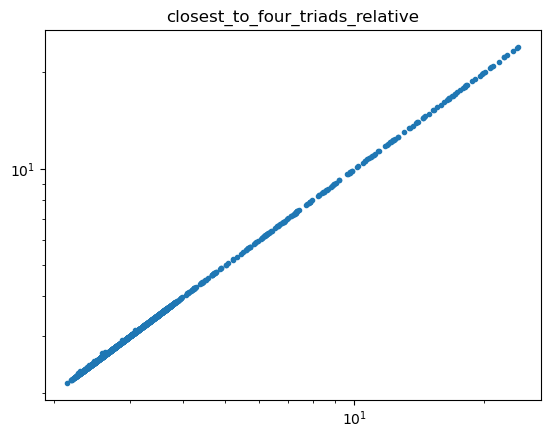

In [50]:
error_fun_name = error_functions[14].__name__
plt.loglog(df2_erho_correct_g[error_fun_name], df2_erho_correct_g[error_fun_name + "_mean"], '.')
plt.title(error_fun_name)

Text(0.5, 1.0, 'closest_to_six_triads_transformed')

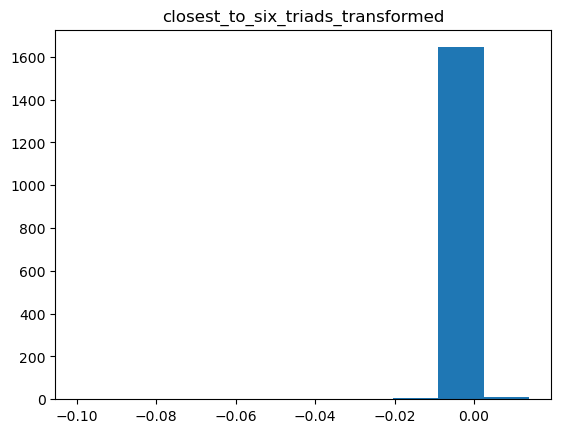

In [51]:
error_fun_name = error_functions[6].__name__
plt.hist((df2_erho_correct_g[error_fun_name] - df2_erho_correct_g[error_fun_name + "_mean"]) / df2_erho_correct_g[error_fun_name + "_mean"])
plt.title(error_fun_name)

In [55]:
np.sort(df2_erho_correct_g[error_fun_name])[0:10], np.sort(df2_erho_correct_g[error_fun_name + "_mean"])[0:10]

(array([0.0057769 , 0.00599144, 0.00625507, 0.00685288, 0.00817293,
        0.00850851, 0.00906452, 0.01082795, 0.0110129 , 0.01161996]),
 array([0.00605003, 0.00606475, 0.00663122, 0.00729193, 0.00817293,
        0.00850851, 0.00906452, 0.01084772, 0.01103206, 0.0120169 ]))

In [52]:
path = Path(outputs_epi_rhoinits, "qs_grouped_corr2.h5")
df2_erho_correct_g.to_hdf(path, key = 'df2_erho_correct_g')

## Finding average best simulations

In [56]:
epinions.rho.values[0]

0.8740507562470957

In [57]:


def max_rho(real_rho, dif = 0.2, top = 0.98):
    rho = real_rho + dif
    if rho > top:
        rho = top
    return rho

def min_rho(real_rho, dif = 0.2, bot = 0.):
    rho = real_rho - dif
    if rho < bot:
        rho = bot
    return rho

In [58]:
def get_best_inds(dfs, error_functions, kmin, non_nan_cols, real_datasets_all = None, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True):
    
    if callable(mins_rho):
        mins_rho = [mins_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(mins_rho):
        mins_rho = [0. for _ in range(len(dfs))]
    if callable(maxs_rho):
        maxs_rho = [maxs_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(maxs_rho):
        maxs_rho = [1. for _ in range(len(dfs))]
    
    inds_smallests = []
    for data_ind, df in enumerate(dfs):
        # print(data_ind)
        inds_smallest = []
        for error_fun in error_functions:
            arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                                (row.rho < maxs_rho[data_ind]) & (row.rho > mins_rho[data_ind])  ) else 100 
                for ind,row in df.iterrows()]
            inds_p = np.argpartition(arr, kmin)[:kmin]
            inds_smallest.extend(inds_p)
        inds_smallests.append(inds_smallest)

        if verbose:
            print(df.iloc[inds_smallest].to_markdown())
    
    return inds_smallests

def get_smallest_inds(dfs, error_functions, non_nan_cols, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True):
    kmin = 1
    return get_best_inds(dfs, error_functions, kmin, non_nan_cols, mins_rho, maxs_rho, verbose)

def get_closest_to_best_inds(dfs, error_functions, accepted_dif, non_nan_cols, real_datasets_all = None, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True, inds_smallests = []):
    # if np.isempty(inds_smallests):
    #     inds_smallests = get_smallest_inds(df2_rho_correct_gs, error_functions, non_nan_cols, min_rho, max_rho, verbose = False)
    
    if callable(mins_rho):
        mins_rho = [mins_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(mins_rho):
        mins_rho = [0. for _ in range(len(dfs))]
    if callable(maxs_rho):
        maxs_rho = [maxs_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(maxs_rho):
        maxs_rho = [1. for _ in range(len(dfs))]
    
    inds_closests = []
    inds_closests2 = []
    for data_ind, df in enumerate(dfs):
        # print(data_ind)
        inds_closest = []
        inds_closest2 = []
        for error_fun in error_functions:
            arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                                (row.rho < maxs_rho[data_ind]) & (row.rho > mins_rho[data_ind])  ) else 100 
                for ind,row in df.iterrows()]
            
            inds_p = np.where(arr < np.min(arr) * accepted_dif)[0]

            inds_closest.extend(inds_p)
            inds_closest2.append(inds_p)
        inds_closests.append(inds_closest)
        inds_closests2.append(inds_closest2)

        if verbose:
            print(list(map(len, inds_closest2)))
            print(df.iloc[inds_closest].to_markdown())
            # print(df2_rho_correct_gs[data_ind].iloc[np.where(inds)[0]].to_markdown())
    
    return inds_closests, inds_closests2



def get_closest_to_best_inds2(dfs, error_functions, k, non_nan_cols, real_datasets_all = None, mins_rho = np.NaN, 
                              maxs_rho = np.NaN, verbose = True, inds_smallests = [], error_mean_ensemble = True):
    """Difference with the above is such that closest is defined using std of error function. 

    Args:
        dfs (_type_): _description_
        error_functions (_type_): _description_
        k (_type_): number of standard deviations
        non_nan_cols (_type_): _description_
        real_datasets_all (_type_, optional): _description_. Defaults to None.
        mins_rho (_type_, optional): _description_. Defaults to np.NaN.
        maxs_rho (_type_, optional): _description_. Defaults to np.NaN.
        verbose (bool, optional): _description_. Defaults to True.
        inds_smallests (list, optional): _description_. Defaults to [].
        error_mean_ensemble (bool, optional): if True error_fun.__name__ rows are used. 
            If False, error_fun.__name__ + "_mean" are used. 

    Returns:
        _type_: _description_
    """
    # if np.isempty(inds_smallests):
    #     inds_smallests = get_smallest_inds(df2_rho_correct_gs, error_functions, non_nan_cols, min_rho, max_rho, verbose = False)
    
    if callable(mins_rho):
        mins_rho = [mins_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(mins_rho):
        mins_rho = [0. for _ in range(len(dfs))]
    if callable(maxs_rho):
        maxs_rho = [maxs_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(maxs_rho):
        maxs_rho = [1. for _ in range(len(dfs))]
    
    inds_closests = []
    inds_closests2 = []
    for data_ind, df in enumerate(dfs):
        # print(data_ind)
        inds_closest = []
        inds_closest2 = []
        for error_fun in error_functions:
            colname = error_fun.__name__ if error_mean_ensemble else error_fun.__name__ + "_mean"
            arr = [row[colname] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                                (row.rho < maxs_rho[data_ind]) & (row.rho > mins_rho[data_ind])  ) else 100 
                for ind,row in df.iterrows()]
            
            inds_min = np.where(arr == np.min(arr))[0]
            val = df.iloc[inds_min][colname].values
            val_std = df.iloc[inds_min][error_fun.__name__ + "_std"].values
            
            # print(arr)
            # print(val + k*val_std)
            inds_p = np.where(arr <= val + k*val_std)[0]

            inds_closest.extend(inds_p)
            inds_closest2.append(inds_p)
        inds_closests.append(inds_closest)
        inds_closests2.append(inds_closest2)

        if verbose:
            print(list(map(len, inds_closest2)))
            print(df.iloc[inds_closest].to_markdown())
            # print(df2_rho_correct_gs[data_ind].iloc[np.where(inds)[0]].to_markdown())
    
    return inds_closests, inds_closests2

In [59]:
error_functions[6]

<function __main__.closest_to_six_triads_transformed(original_data, model_data, is_data_transformed=False)>

In [64]:
non_nan_cols = ['rho']

inds_closests10, inds_closests10_2 = get_closest_to_best_inds([df2_erho_correct_g], [error_functions[6]], 1.5, non_nan_cols, [epinions,], lambda x: min_rho(x, 0.1), lambda x: max_rho(x, 0.1), verbose = True)



[1]
|                       |    q |   p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |     tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |    tr3_lvl |   tr3_lvl_std |   tr3_sim_std |     tr4_lvl |   tr4_lvl_std |   tr4_sim_std |    tr5_lvl |   tr5_lvl_std |   tr5_sim_std |    tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |    tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |    tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_sim_std

In [63]:
inds_closests10, inds_closests10_2 = get_closest_to_best_inds2([df2_erho_correct_g], [error_functions[6], error_functions[13]], 7, non_nan_cols, [epinions,], lambda x: min_rho(x, 0.10), lambda x: max_rho(x, 0.10), verbose = True, error_mean_ensemble=True)


[3, 1]
|                        |     q |   p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |     tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |    tr3_lvl |   tr3_lvl_std |   tr3_sim_std |     tr4_lvl |   tr4_lvl_std |   tr4_sim_std |    tr5_lvl |   tr5_lvl_std |   tr5_sim_std |    tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |    tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |    tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_si

In [72]:
def add_method_err(err, met_err):
    return np.sqrt(err**2 / 3 + met_err**2)

def ave_std(series):
    """When we have a series of std. And for another series we take the mean, 
    then we would like to know what is the std dev of the new result. 
    And std dev will include std devs of partial results. This
    function will calculate this. 

    Args:
        series (_type_): _description_
    """
    return np.sqrt(np.sum(series ** 2)) / len(series)

def average_best_results(df2, inds_closest10, dataname, q_grid = 0.025, p_grid = 0.5, ps_grid = 0.5, which_rho = 4):
   columns = ['q', 'p', 'ps', 'rho',
       'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7',]

   df_temp = df2.iloc[inds_closest10]
   df_temp_mean = df_temp.aggregate(['mean'])[columns]
   df_temp_mean["school"] = dataname
   df_temp_mean.set_index("school", inplace = True, drop=True)
   
#    df_temp_mean.columns = [col + "_mean" for col in df_temp_mean]

   df_temp_std = df_temp.aggregate(['std'])[columns]
   df_temp_std["school"] = dataname
   df_temp_std.set_index("school", inplace = True, drop=True)

   df_temp_std.columns = [col + "_std" for col in df_temp_std]
   
   part_cols = [col + "_sim_std" + str(which_rho) for col in columns[3:]]
   df_temp_std_partials = df_temp.aggregate([ave_std])[part_cols]

   # print(df_temp_std.q_std)
   df_temp_std.q_std = add_method_err(q_grid / 2, df_temp_std.q_std) if not any(np.isnan(df_temp_std.q_std) ) else add_method_err(q_grid / 2, 0)
   df_temp_std.p_std = add_method_err(p_grid / 2, df_temp_std.p_std) if not any(np.isnan(df_temp_std.p_std) ) else add_method_err(p_grid / 2, 0)
   df_temp_std.ps_std = add_method_err(ps_grid / 2, df_temp_std.ps_std) if not any(np.isnan(df_temp_std.ps_std) ) else add_method_err(ps_grid / 2, 0)
   
   for col, pcol in zip(columns[3:], part_cols):
       df_temp_std[col + "_std"] = df_temp_std_partials[pcol].values
    

   df_temp_sum = df_temp.aggregate(['sum'])[['repetitions']]
   df_temp_sum["school"] = dataname
   df_temp_sum.set_index("school", inplace = True, drop=True)

   return pd.concat([df_temp_mean, df_temp_std, df_temp_sum], axis = 1)
      

In [70]:
inds_closests10_2[0][0]

array([1916])

In [73]:
ave_best = average_best_results(df2_erho_correct_g, inds_closests10_2[0][0], "Epinions", q_grid = 0.025, p_grid = 0.1, ps_grid = 0.1, which_rho = 3)
print(ave_best[["q_std", "p_std", "ps_std"]])
ave_best

             q_std     p_std    ps_std
school                                
Epinions  0.007217  0.028868  0.028868


,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
Epinions,0.95,0.1,0.9,0.953895,0.000057,0.000762,0.000062,0.002723,0.000763,0.001699,...,0.000035,9.628205e-07,0.000002,0.000002,0.000024,0.000002,0.000028,0.000024,0.000067,6


In [39]:
path = Path(outputs_epi_rhoinits, "ave_best.df5")
ave_best.to_hdf(path, key = "ave_best")

# Plots

In [116]:


n1_triads = ['tr3', 'tr5', 'tr6']
n1_nonhierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


### Heatmaps

In [57]:
df2_srho_correct_g_minerrs = df2_srho_correct_g.groupby(by=["q", "p", "ps"]).min()

In [100]:
df2_srho_correct_g_minerrs[inds2]

rho_init  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
q   p   ps                                                                 
1.0 0.0 0.5       0.8            1  0.798349          0.0              1   
    0.1 0.5       0.8            1  0.801862          0.0              1   
    0.2 0.5       0.8            1  0.803582          0.0              1   
    0.3 0.5       0.8            1  0.796324          0.0              1   
    0.4 0.5       0.8            1  0.801191          0.0              1   
    0.5 0.5       0.8            1  0.803749          0.0              1   
    0.6 0.5       0.8            1  0.798011          0.0              1   
    0.7 0.5       0.8            1  0.799142          0.0              1   
    0.8 0.5       0.8            1  0.799376          0.0              1   
    0.9 0.5       0.8            1  0.798857          0.0              1   
    1.0 0.5       0.8            1  0.800090          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  rho_lvl3  rho_lvl3_std  \
q   p   ps                                                                    
1.0 0.0 0.5  0.798349           0.0               1  0.798505           0.0   
    0.1 0.5  0.801862           0.0               1  0.802332           0.0   
    0.2 0.5  0.803582           0.0               1  0.898565           0.0   
    0.3 0.5  0.796324           0.0               1  0.900420           0.0   
    0.4 0.5  0.801191           0.0               1  0.801141           0.0   
    0.5 0.5  0.803749           0.0               1  0.803969           0.0   
    0.6 0.5  0.798011           0.0               1  0.798029           0.0   
    0.7 0.5  0.799142           0.0               1  0.798795           0.0   
    0.8 0.5  0.799376           0.0               1  0.798953           0.0   
    0.9 0.5  0.798857           0.0               1  0.798789           0.0   
    1.0 0.5  0.800090           0.0               1  0.799906           0.0   

             ...  closest_to_six_triads  closest_to_six_triads_transformed  \
q   p   ps   ...                                                             
1.0 0.0 0.5  ...               0.002123                           0.163376   
    0.1 0.5  ...               0.001550                           0.091367   
    0.2 0.5  ...               0.002551                           0.424042   
    0.3 0.5  ...               0.002340                           0.151687   
    0.4 0.5  ...               0.001221                           0.088714   
    0.5 0.5  ...               0.001461                           0.104103   
    0.6 0.5  ...               0.001607                           0.082542   
    0.7 0.5  ...               0.014484                           0.070702   
    0.8 0.5  ...               0.002411                           0.085677   
    0.9 0.5  ...               0.001803                           0.505481   
    1.0 0.5  ...               0.001695                           0.845452   

             closest_to_six_triads_corrdevs_transformed  \
q   p   ps                                                
1.0 0.0 0.5                                    1.008571   
    0.1 0.5                                    1.001576   
    0.2 0.5                                    1.002874   
    0.3 0.5                                    1.120774   
    0.4 0.5                                    1.080453   
    0.5 0.5                                    1.096486   
    0.6 0.5                                    1.076747   
    0.7 0.5                                    1.065539   
    0.8 0.5                                    1.079072   
    0.9 0.5                                    1.037216   
    1.0 0.5                                    1.000966   

             closest_to_four_triads_corrdevs_transformed  \
q   p   ps                                                 
1.0 0.0 0.5                                     0.133809   
    0.1 0.5                      

In [98]:
def get_index_row(df, which):
    return [ind[which] for ind in df.index]

qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))
# qs = np.unique(get_index_row(df2_joined_correct_g, 3))

i = -1


q = qs[i]

inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
df2_srho_correct_g_minerrs[inds2]

df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
if q == 0:
    
    try:
        ps_true = np.unique(df_temp.ps)
    except AttributeError:
        ps_true = np.array([ind[2] for ind in df_temp.index])
    
    if len(ps_true) > 1:
        ps_true = 0.5
    
    for ps in np.arange(0,1.1,0.1):
        ps = round(ps, 2)
        if ps == ps_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ind[1], ps)
            row.ps = ps
            # df_temp[new_ind] = row
            df_temp = df_temp.append(row, ignore_index = True)
            # print(ps)
elif q == 1.:
    
    try:
        ph_true = np.unique(df_temp.p)
    except AttributeError:
        ph_true = np.array([ind[1] for ind in df_temp.index])
    
    if len(ph_true) > 1:
        ph_true = 0.5
        
    for ph in np.arange(0,1.1,0.1):
        ph = round(ph, 2)
        if ph == ph_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ps, ind[2])
            row.p = ph
            # row.ps = ind[2]
            # df_temp[new_ind] = row
            df_temp = df_temp.append(pd.DataFrame([row],index=[new_ind],columns=df2_srho_correct_g_minerrs.columns))
            
            print(ps)

df_temp

pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
pv
# pv = pd.pivot_table(df2_w1000_g[inds2], values = "closest_to_rho", index = "ps", columns = "p")
# pv
# pv["0.6"] = pv["0.5"]
# pv



0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


p,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
ps,,,,,,,,,,,
0.5,0.00047,0.000651,0.014821,0.015276,0.000591,0.003158,0.00045,0.000483,0.00049,0.000482,0.000533


/tmp/ipykernel_105599/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

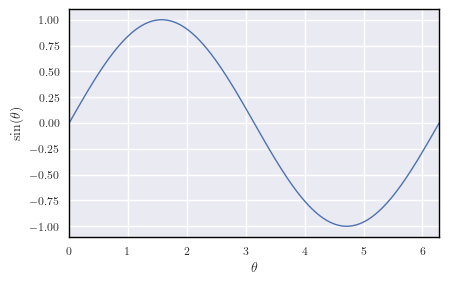

In [59]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



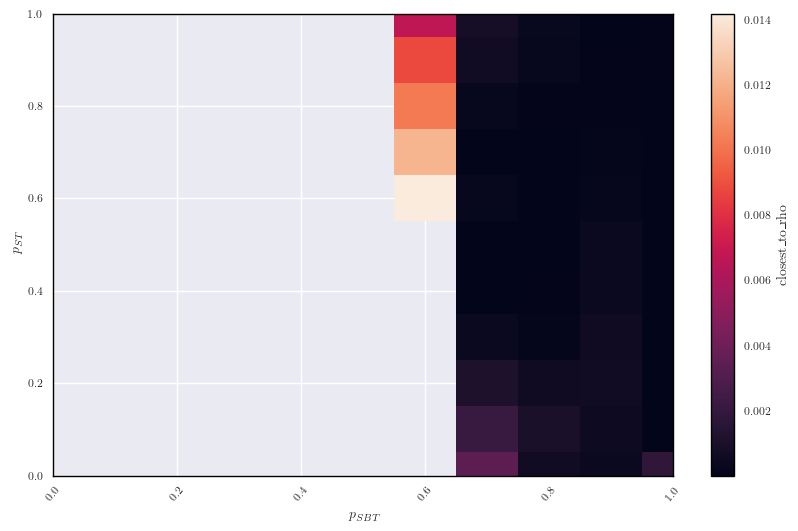

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

ax.tick_params(axis='x', which='major', rotation=50)
# ax.set_xticks(pv.columns)
# ax.set_yticks(pv.index)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

cbar = fig.colorbar(colormesh,ax = ax)

# ax.plot(pbs, rho_crits, color='black')

ax.set_xlabel(r'$p_{SBT}$')
ax.set_ylabel(r'$p_{ST}$')
# ax.set_xlabel('p_SB')

cbar.set_label("closest_to_rho")

Text(0.5, 0.98, ' closest_to_rho ')

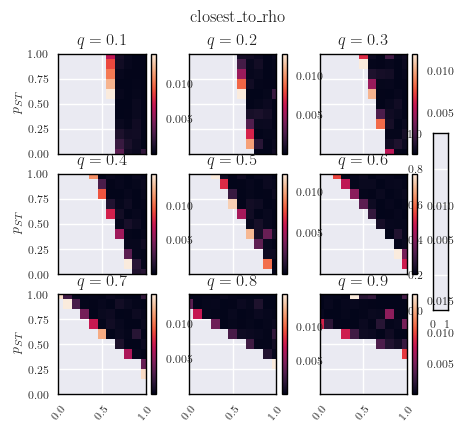

In [101]:

save_ = False

figsize = set_size(width)
figsize = (figsize[0], figsize[1]*1.5)

fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))

minval = df2_srho_correct_g_minerrs.describe().closest_to_rho["min"]
maxval = df2_srho_correct_g_minerrs.describe().closest_to_rho["max"]

for i, (ax, q) in enumerate(zip(axs.flat, qs)):
    # if i == 11:
    #     continue
    inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
    
    df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
    if q == 0:
        
        ps_true = np.unique(df_temp.ps)
        
        for ps in np.arange(0,1.1,0.1):
            ps = round(ps, 2)
            if ps == ps_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ind[1], ps)
                row.ps = ps
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)
    elif q == 1.:
        continue
        ph_true = np.unique(df_temp.p)
        
        for ph in np.arange(0,1.1,0.1):
            ph = round(ph, 2)
            if ph == ph_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ps, ind[2])
                row.p = ph
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)

    # df_temp
    
    pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
    # print(pv)
    colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

    ax.tick_params(axis='x', which='major', rotation=50)
    # ax.set_xticks(pv.columns)
    # ax.set_yticks(pv.index)
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    cbar = fig.colorbar(colormesh,ax = ax)

    # ax.set_xlabel(r'$p_{SBT}$')
    # ax.set_ylabel(r'$p_{ST}$')
    # # ax.set_xlabel('p_SB')

    # cbar.set_label("closest_to_rho")

    ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
    
    # fmt = '{:0.1f}'
    # xticklabels = []
    # for item in ax.get_xticklabels():
    #     item.set_text(fmt.format(float(item.get_text())))
    #     xticklabels += [item]
        
    # if len(ax.get_yticklabels()) > 0:
    #     # print(q)
    #     yticklabels = []
        
    #     for item in ax.get_yticklabels():
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels += [item]
    # else:
    #     yticklabels2 = []
    #     for item in yticklabels:
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels2 += [item]
    #     ax.set_yticklabels(yticklabels2)
    
    
    if i%3 == 0:
        # print(yticklabels)
        # ax.set_yticklabels(yticklabels)
        # print(ax.get_yticklabels())
        ax.set_ylabel(r'$p_{ST}$')
    else:
        # print(ax.get_yticklabels())
        ax.set_ylabel('')
        ax.tick_params(left=False)
        # print(yticklabels)
    if i == 10:
        ax.set_xlabel(r'$p_{SBT}$')
    else:
        ax.set_xlabel('')
    if i < 9:
        ax.tick_params(bottom=False)
    # else:
        # ax.set_xticklabels(xticklabels)
    # else: break

# axs.fla

fig.suptitle(' closest_to_rho ')

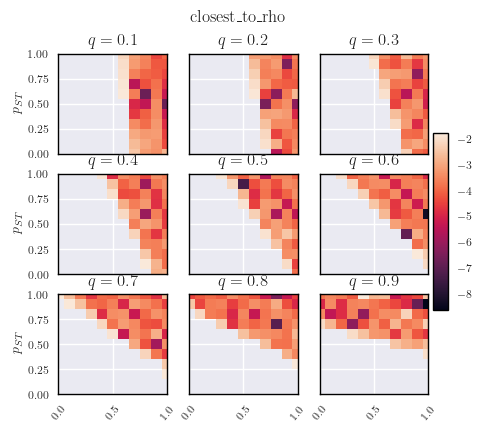

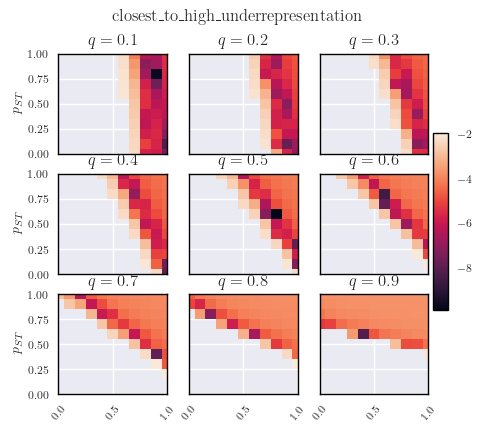

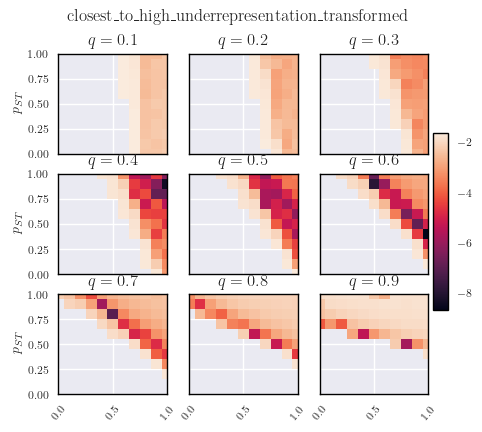

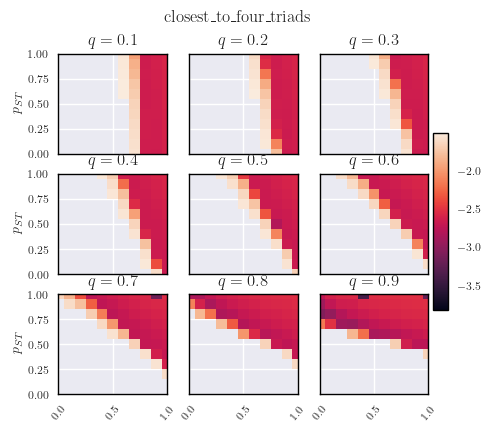

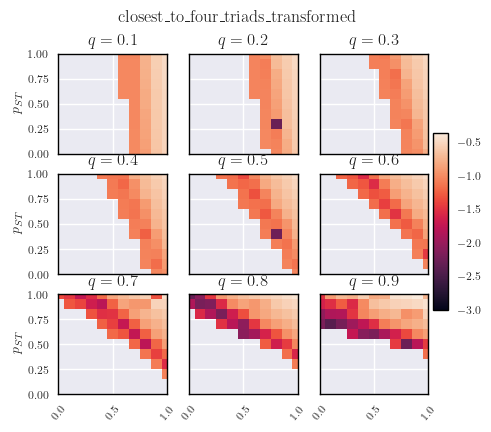

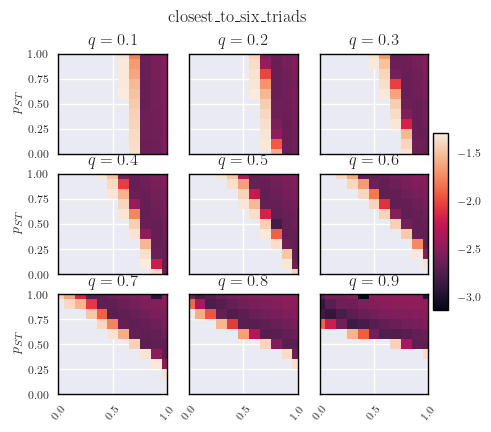

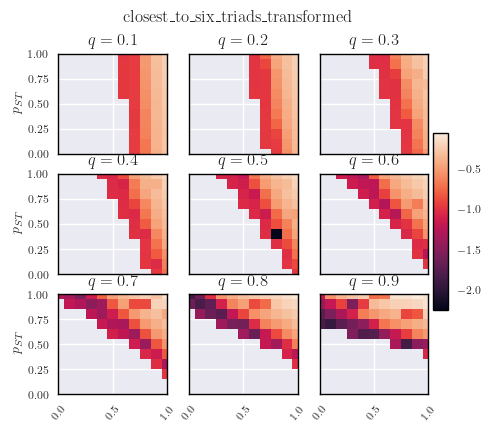

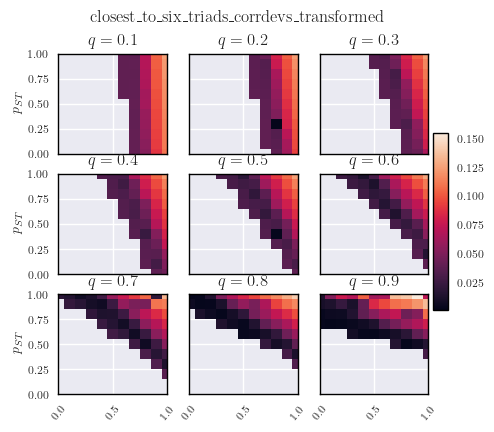

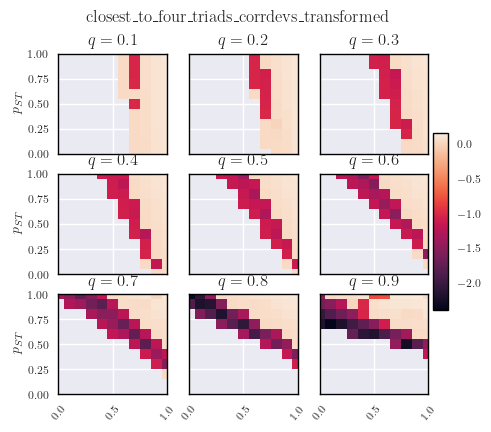

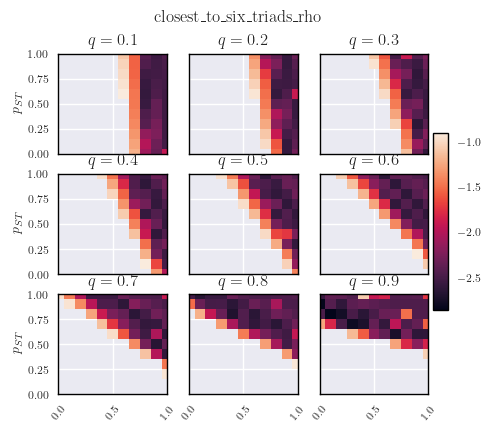

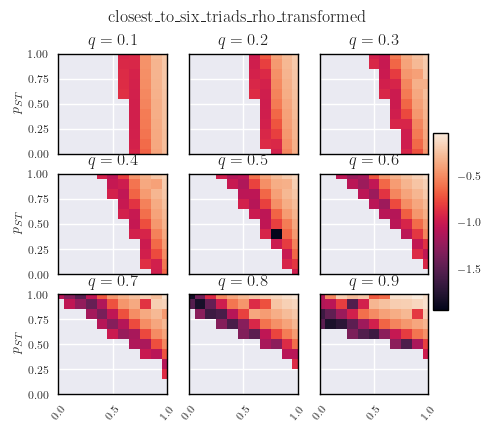

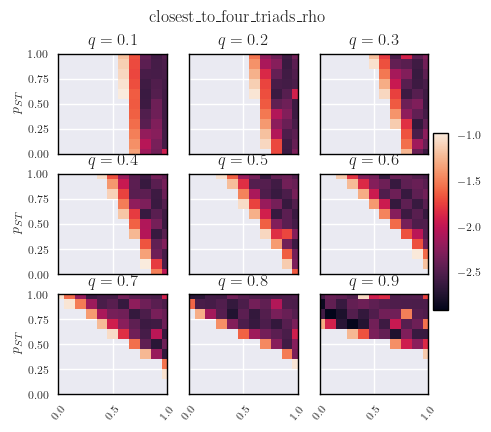

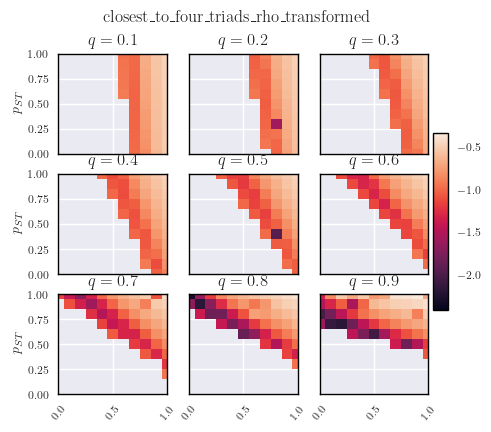

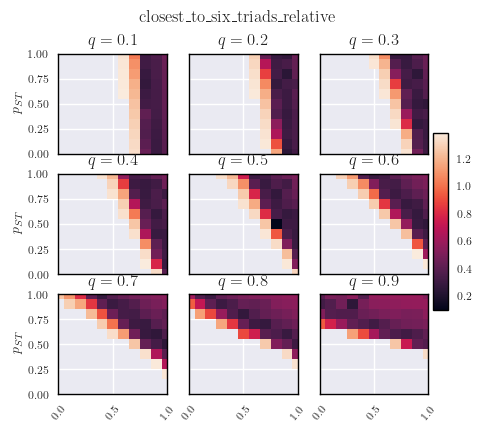

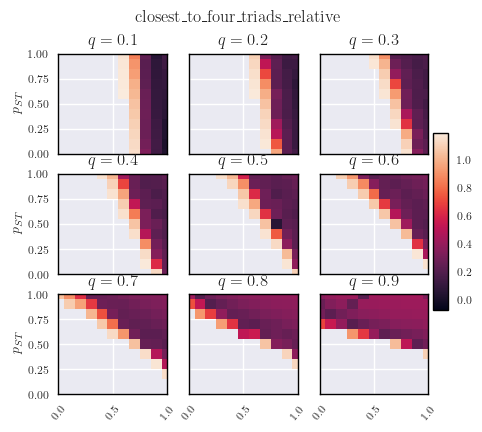

In [102]:

save_ = False
log = True

for error_fun in error_functions:
    error_fun_name = error_fun.__name__

    figsize = set_size(width)
    figsize = (figsize[0], figsize[1]*1.5)

    fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))

    minval = df2_srho_correct_g_minerrs.describe()[error_fun_name]["min"]
    maxval = df2_srho_correct_g_minerrs.describe()[error_fun_name]["max"]
    if log:
        minval = np.log10(minval)
        maxval = np.log10(maxval)
    
    for i, (ax, q) in enumerate(zip(axs.flat, qs)):
        # if i == 11:
        #     continue

        inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
    
        df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
        if q == 0:
            continue
            ps_true = np.unique(df_temp.ps)
            
            for ps in np.arange(0,1.1,0.1):
                ps = round(ps, 2)
                if ps == ps_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ind[1], ps)
                    row.ps = ps
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)
        elif q == 1.:
            continue
            ph_true = np.unique(df_temp.p)
            
            for ph in np.arange(0,1.1,0.1):
                ph = round(ph, 2)
                if ph == ph_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ps, ind[2])
                    row.p = ph
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)

        # df_temp
        
        pv = pd.pivot_table(df_temp, values = error_fun_name, index = "ps", columns = "p")
        if log == True:
            pv = np.log10(pv)
        colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True),
                                  vmin = minval, vmax = maxval)

        ax.tick_params(axis='x', which='major', rotation=50)
        # ax.set_xticks(pv.columns)
        # ax.set_yticks(pv.index)
        
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])

        if i == 0:
            cbar = fig.colorbar(colormesh,cax = cbar_ax)#, fraction=0.046, pad=0.04)#,vmin = minval, vmax = maxval)
        
        
        # sns.heatmap(pv, square = True, ax = ax, cbar_ax = cbar_ax, cbar = i == 0, vmin = minval, vmax = maxval)
        
        ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
        
        # fmt = '{:0.1f}'
        # xticklabels = []
        # for item in ax.get_xticklabels():
        #     item.set_text(fmt.format(float(item.get_text())))
        #     xticklabels += [item]
            
        # if len(ax.get_yticklabels()) > 0:
        #     # print(q)
        #     yticklabels = []
            
        #     for item in ax.get_yticklabels():
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels += [item]
        # else:
        #     yticklabels2 = []
        #     for item in yticklabels:
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels2 += [item]
        #     ax.set_yticklabels(yticklabels2)
        
        if i%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            ax.set_ylabel(r'$p_{ST}$')
        else:
            # print(ax.get_yticklabels())
            ax.set_ylabel('')
            ax.tick_params(left=False)
            # print(yticklabels)
        if i == 10:
            ax.set_xlabel(r'$p_{SBT}$')
        else:
            ax.set_xlabel('')
        if i < 9:
            ax.tick_params(bottom=False)
        # else:
            # ax.set_xticklabels(xticklabels)
    
    fig.suptitle(error_fun_name)
    
    if save_:
        fname = "maps/map_long2_" + error_fun_name
        # fname = fname + filename_addon
        if log:
            fname = fname + "_log"
        fname = fname + ".pdf"
        
        fig.savefig(fname, format='pdf', bbox_inches='tight') 

## Barplots

In [117]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None):
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
#     width = 0.15
    multiplier = 0
    x = np.arange(len(n_simulated.index))*3-1.5
    for i, col in enumerate(n_simulated.columns):
        offset = multiplier*width*4
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        # ax.bar_label(rects, padding=3)
        # print("D")
        multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)

def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            yerr = std_data[col_names].copy()
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None, norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    ydata = n_data.loc[triads_set_final]
    ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        yerr = yerr.loc[triads_set_final]
        yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

In [118]:

df2_erho_correct_g.iloc[inds_g3[-1]]

q                                         0.100000
p                                         0.900000
ps                                        0.700000
rho_init                                  0.000000
repetitions                               2.000000
                                            ...   
closest_to_six_triads_rho_transformed     0.358945
closest_to_four_triads_rho                0.002437
closest_to_four_triads_rho_transformed    0.235001
closest_to_six_triads_relative            3.378631
closest_to_four_triads_relative           2.189951
Name: (0.1, 0.9, 0.7, 0.0), Length: 118, dtype: float64

In [119]:
prepare_data5(df2_erho_correct_g.iloc[[inds_g3[-1]]], n1_triads, addon = "_lvl3")

(               0.1
                0.9
                0.7
                0.0
 q              0.1
 p              0.9
 ps             0.7
 tr3_lvl3 -0.075015
 tr5_lvl3  0.023758
 tr6_lvl3  0.051257,
 None)

In [120]:
ydata, yerr = prepare_data5(df2_erho_correct_g.iloc[inds_g3], n1_triads)
ydata

0.300     0.200     0.400     0.500     0.900     0.600     0.875  \
              0.9       0.7       0.9       0.9       0.1       0.4       0.1   
              0.3       0.9       0.4       0.3       0.7       1.0       0.9   
              0.0       0.6       0.0       0.2       0.4       0.4       0.8   
q           0.300     0.200     0.400     0.500     0.900     0.600     0.875   
p             0.9       0.7       0.9       0.9       0.1       0.4       0.1   
ps            0.3       0.9       0.4       0.3       0.7       1.0       0.9   
tr3_lvl -0.029707 -0.000011 -0.026490  0.000649  0.050983  0.014112  0.053501   
tr5_lvl  0.009167 -0.002133  0.006927 -0.004604 -0.051150 -0.012946 -0.058718   
tr6_lvl  0.020540  0.002143  0.019563  0.003955  0.000167 -0.001166  0.005217   

            0.850     0.900            ...     0.850     0.950            \
              0.2       0.5       0.0  ...       0.2       0.0             
              1.0       0.7       0.8  ...       0.8       0.8       0.9   
              0.6       0.6       0.4  ...       0.4       0.2       0.4   
q           0.850     0.900     0.900  ...     0.850     0.950     0.950   
p             0.2       0.5       0.0  ...       0.2       0.0       0.0   
ps            1.0       0.7       0.8  ...       0.8       0.8       0.9   
tr3_lvl  0.010732  0.029772  0.058281  ...  0.044543  0.079244  0.069286   
tr5_lvl -0.050113 -0.049110 -0.063030  ... -0.038866 -0.111604 -0.138152   
tr6_lvl  0.039381  0.019338  0.004748  ... -0.005676  0.032360  0.068865   

            0.900     0.000               0.850     0.900     0.925     0.100  
              0.0       0.8                 0.0       0.0       0.0       0.9  
              1.0       0.5                 1.0       0.8       0.8       0.7  
              0.4       0.0       0.2       0.0       0.9       0.4       0.0  
q           0.900     0.000     0.000     0.850     0.900     0.925     0.100  
p             0.0       0.8       0.8       0.0       0.0       0.0       0.9  
ps            1.0       0.5       0.5       1.0       0.8       0.8       0.7  
tr3_lvl  0.048437 -0.037964 -0.039236  0.041943  0.062044  0.069056 -0.077905  
tr5_lvl -0.090356  0.014666  0.015269 -0.053748 -0.074272 -0.081169  0.025402  
tr6_lvl  0.041919  0.023297  0.023966  0.011805  0.012229  0.012113  0.052502  

[3 rows x 45 columns]

In [121]:
ydata, yerr = prepare_data5(epinions, n1_triads)
ydata

,epinions
tr3,-0.022066
tr5,-0.138263
tr6,0.160329


/tmp/ipykernel_128207/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

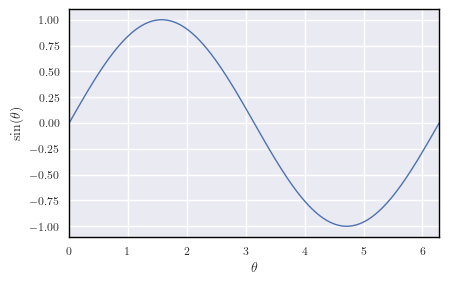

In [122]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



[0.  0.1 0.2 0.3 0.4 0.5 0.6]


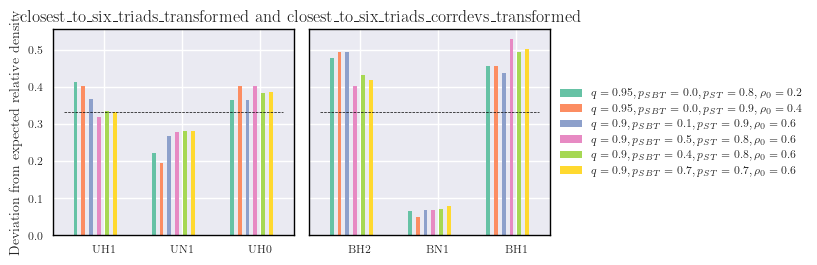

In [124]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
addon = "_lvl"
which_group = 3 #there can be `group_size` bars (8 at max). If data has more, which to show
group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

try:
    plt.title(error_functions[0 + which_group*2].__name__ + " and " + error_functions[1 + which_group*2].__name__)
except IndexError:
    plt.title(error_functions[0 + which_group*2].__name__)

fname = 'barplots_sim'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [156]:
inds_g3[group_size*which_group:group_size*(which_group+1)]

[1564, 1640, 1549, 1564, 1662, 1640]

In [130]:
ydata, yerr = fun_prepare_data(df2_srho_correct_g.iloc[inds_g3],  triads_set, std_data = None)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata

0.8                                                              \
              0.1                 0.0                                           
              0.9                 1.0                                           
              0.9                 0.9                                           
q             0.8                 0.8                                           
p             0.1                 0.0                                           
ps            0.9       0.9       1.0       1.0       1.0       1.0       1.0   
tr1_lvl  0.538871  0.538871  0.557429  0.557429  0.557429  0.557429  0.557429   
tr2_lvl  0.151230  0.151230  0.131741  0.131741  0.131741  0.131741  0.131741   
tr4_lvl  0.309899  0.309899  0.310831  0.310831  0.310831  0.310831  0.310831   

                        0.9       0.7       0.2       0.6  
                        0.2       1.0       0.9       1.0  
                        0.7       0.5       0.0       0.5  
                        0.8       0.4       0.6       0.4  
q                       0.9       0.7       0.2       0.6  
p                       0.2       1.0       0.9       1.0  
ps            1.0       0.7       0.5       0.0       0.5  
tr1_lvl  0.557429  0.561271  0.213196  0.187380  0.176332  
tr2_lvl  0.131741  0.115508  0.138307  0.224443  0.153624  
tr4_lvl  0.310831  0.323221  0.648498  0.588177  0.670044

In [252]:
inds_g[group_size*which_group:group_size*(which_group+1)]

[1865, 1831, 1845, 1610, 1865, 1626]

In [54]:
slash

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
slashdot,0.012361,0.051867,0.014518,0.024771,0.020277,0.020386,0.029772,0.826048,1251925.0,221397.0,285003.0,0.776823,15475.0,64934.0,18176.0,31011.0,25385.0,25522.0,37272.0,1034150.0


### Notes 

* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.8$, $\rho_0=0.2$ (very good discrepancies 
for BH2, BN1, not so well for other triads;  best in closest to 4 triads, )
* I like $q=0.9$, $p_{SBT} = 0.7$, $p_{ST} = 0.7$, $\rho_0=0.4$ (good discrepancies for Delta2 (wrong for BH2, too big for BH1, very good for BN1), good for Delta1 (too small);  best in high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.8$, $\rho_0=0.8$ (very good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.2$, $p_{ST} = 1.0$, $\rho_0=0.8$ (very good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.8$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.4$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small and wrong overrep for UH1 but best underrep for UN1);  best in closest to 6 triads rho trans, 4 triads rho trans)

### When limiting to empirical $\rho\pm0.1$:

* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.8$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.4$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small and wrong overrep for UH1 but best underrep for UN1);  best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans)
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.8$, $\rho_0=0.0$ (good discrepancies for Delta 2 and poor for Delta 1 (too small and wrong overrep for UH1);  best in closest to 4 triads)
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.4$ (good discrepancies for Delta 2 and good for Delta 1 (too small);  best in closest to 6 triads rho trans

In [37]:
def get_inds(df, sets, multipleOK = False):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df.q - q) < 1e-8) & (np.abs(df.p - p) < 1e-8) & 
                         (np.abs(df.ps - ps) < 1e-8) & (np.abs(df.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + set_)
        else:
            if len(ind_p[0]) > 1:
                if not multipleOK:
                    print("Multiple points for " + str(set_))
            inds.extend(ind_p[0])
    return inds

In [125]:
sets = [(0.9, 0.0, 0.8, 0.2), (0.9, 0.1, 1., 0.8), 
        (0.9, 0., 1., 0.4), (0.9, 0.2, 1., 0.8), 
        (0.9, 0.7, .7, 0.4), 
        (0.9, 0.6, .8, 0.8), (0.95, 0, 0.9, 0.4) 
        # (0.9, 0.8, 0.6, 0.), (0.9, 0.0, 0.8, 0.9)
        ]

# sets = [(0.9, 0.0, 0.8, 0.0), (0.9, 0.1, 1., 0.8), 
#         (0.9, 0., 1., 0.4), (0.9, 0.1, 0.9, 0.4), 
#         ]



inds = get_inds(df2_erho_correct_g, sets)
df2_erho_correct_g.iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  \
0.90 0.0 0.8 0.2  0.90  0.0  0.8       0.2            2  0.835241   
     0.1 1.0 0.8  0.90  0.1  1.0       0.8            2  0.973773   
     0.0 1.0 0.4  0.90  0.0  1.0       0.4            2  0.910250   
     0.2 1.0 0.8  0.90  0.2  1.0       0.8            2  0.978446   
     0.7 0.7 0.4  0.90  0.7  0.7       0.4            2  0.938112   
     0.6 0.8 0.8  0.90  0.6  0.8       0.8            2  0.978234   
0.95 0.0 0.9 0.4  0.95  0.0  0.9       0.4            2  0.907698   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.90 0.0 0.8 0.2     0.002641              2     0.007741  0.835241  ...   
     0.1 1.0 0.8     0.000743              2     0.001234  0.973773  ...   
     0.0 1.0 0.4     0.002566              2     0.001119  0.910250  ...   
     0.2 1.0 0.8     0.000530              2     0.000413  0.978446  ...   
     0.7 0.7 0.4     0.002195              2     0.000982  0.938112  ...   
     0.6 0.8 0.8     0.000516              2     0.001299  0.978234  ...   
0.95 0.0 0.9 0.4     0.001772              2     0.000555  0.907698  ...   

                  closest_to_six_triads  closest_to_six_triads_transformed  \
0.90 0.0 0.8 0.2               0.001094                           0.044320   
     0.1 1.0 0.8                    NaN                                NaN   
     0.0 1.0 0.4               0.001785                           0.020728   
     0.2 1.0 0.8                    NaN                                NaN   
     0.7 0.7 0.4               0.002006                           0.058816   
     0.6 0.8 0.8               0.002537                           0.008173   
0.95 0.0 0.9 0.4               0.001932                           0.014814   

                  closest_to_six_triads_corrdevs_transformed  \
0.90 0.0 0.8 0.2                                    1.032641   
     0.1 1.0 0.8                                         NaN   
     0.0 1.0 0.4                                    1.015050   
     0.2 1.0 0.8                                         NaN   
     0.7 0.7 0.4                                    0.036446   
     0.6 0.8 0.8                                    0.007753   
0.95 0.0 0.9 0.4                                    1.008008   

                  closest_to_four_triads_corrdevs_transformed  \
0.90 0.0 0.8 0.2                                     0.032641   
     0.1 1.0 0.8                                          NaN   
     0.0 1.0 0.4                                     0.015050   
     0.2 1.0 0.8                                          NaN   
     0.7 0.7 0.4                                     0.036446   
     0.6 0.8 0.8                                     0.007753   
0.95 0.0 0.9 0.4                                     0.008008   

                  closest_to_six_triads_rho  \
0.90 0.0 0.8 0.2                   0.008306   
     0.1 1.0 0.8                        NaN   
     0.0 1.0 0.4                   0.008607   
     0.2 1.0 0.8                        NaN   
     0.7 0.7 0.4                   0.024017   
     0.6 0.8 0.8                   0.057544   
0.95 0.0 0.9 0.4                   0.008157   

                  closest_to_six_triads_rho_transformed  \
0.90 0.0 0.8 0.2                               0.047205   
     0.1 1.0 0.8                                    NaN   
     0.0 1.0 0.4                               0.023457   
     0.2 1.0 0.8                                    NaN   
     0.7 0.7 0.4                               0.067620   
     0.6 0.8 0.8                               0.030176   
0.95 0.0 0.9 0.4                               0.017304   

                  closest_to_four_triads_rho  \
0.90 0.0 0.8 0.2                    0.007757   
     0.1 1.0 0.8                         NaN   
     0.0 1.0 0.4                    0.007973   
     0.2 1.0 0.8                         NaN   
     0.7 0.7 0.4                    0.023290   
     0.6 0.8 0.8                    0.056637   
0.95 0.0 0.9 0

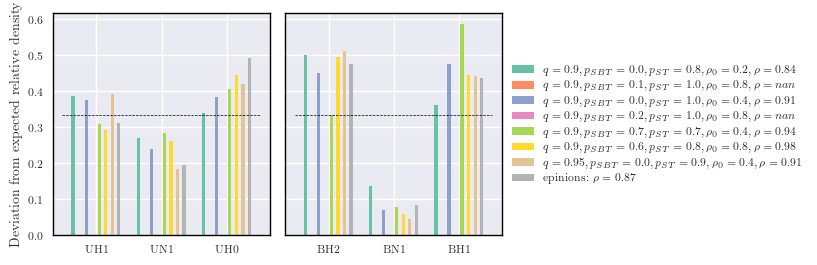

In [127]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0#there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = False
show_rho = True

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_erho_correct_g.iloc[inds].rho.values[group_size*which_group:group_size*(which_group+1)]
    epi_rho = epinions.rho.values[0]
else:
    rhos = None
    epi_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, yerr, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds],  triads_set, 
                               std_data = df2_erho_correct_g.iloc[inds], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_epinions_s2000_rhoinit'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [254]:
sets = [(0.9, 0.0, 0.8, 0.0), (0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0)] 
        # (0.775, 1.0, 0.5, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0), 
        (0.775, 1.0, 0.5, 0.0)]

inds = get_inds(df2_joined_correct_g, sets)
df2_joined_correct_g.iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  \
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.915134   
              0.2  0.900  0.8  0.6       0.2            1  0.891006   
0.925 0.7 0.6 0.0  0.925  0.7  0.6       0.0            1  0.851985   
0.850 0.6 0.7 0.4  0.850  0.6  0.7       0.4            1  0.913060   
      1.0 0.5 0.0  0.850  1.0  0.5       0.0            1  0.830820   
0.900 0.4 0.7 0.0  0.900  0.4  0.7       0.0            1  0.840841   
0.925 0.3 0.7 0.0  0.925  0.3  0.7       0.0            1  0.842721   
0.775 1.0 0.5 0.0  0.775  1.0  0.5       0.0            1  0.835193   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.900 0.8 0.6 0.4          0.0              1  0.915134           0.0  ...   
              0.2          0.0              1  0.891006           0.0  ...   
0.925 0.7 0.6 0.0          0.0              1  0.851985           0.0  ...   
0.850 0.6 0.7 0.4          0.0              1  0.913060           0.0  ...   
      1.0 0.5 0.0          0.0              1  0.830820           0.0  ...   
0.900 0.4 0.7 0.0          0.0              1  0.840841           0.0  ...   
0.925 0.3 0.7 0.0          0.0              1  0.842721           0.0  ...   
0.775 1.0 0.5 0.0          0.0              1  0.835193           0.0  ...   

                   closest_to_six_triads  closest_to_six_triads_transformed  \
0.900 0.8 0.6 0.4               0.005310                           0.010699   
              0.2               0.003697                           0.008505   
0.925 0.7 0.6 0.0               0.001727                           0.008609   
0.850 0.6 0.7 0.4               0.005056                           0.008823   
      1.0 0.5 0.0               0.000820                           0.011800   
0.900 0.4 0.7 0.0               0.001503                           0.009449   
0.925 0.3 0.7 0.0               0.001845                           0.010226   
0.775 1.0 0.5 0.0               0.000774                           0.015972   

                   closest_to_six_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                    0.006890   
              0.2                                    0.008062   
0.925 0.7 0.6 0.0                                    0.007318   
0.850 0.6 0.7 0.4                                    0.007262   
      1.0 0.5 0.0                                    0.010422   
0.900 0.4 0.7 0.0                                    0.008631   
0.925 0.3 0.7 0.0                                    0.009665   
0.775 1.0 0.5 0.0                                    1.015712   

                   closest_to_four_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                     0.006890   
              0.2                                     0.008062   
0.925 0.7 0.6 0.0                                     0.007318   
0.850 0.6 0.7 0.4                                     0.007262   
      1.0 0.5 0.0                                     0.010422   
0.900 0.4 0.7 0.0                                     0.008631   
0.925 0.3 0.7 0.0                                     0.009665   
0.775 1.0 0.5 0.0                                     0.015712   

                   closest_to_six_triads_rho  \
0.900 0.8 0.6 0.4                   0.079833   
              0.2                   0.050445   
0.925 0.7 0.6 0.0                   0.018938   
0.850 0.6 0.7 0.4                   0.075343   
      1.0 0.5 0.0                   0.007907   
0.900 0.4 0.7 0.0                   0.015064   
0.925 0.3 0.7 0.0                   0.014670   
0.775 1.0 0.5 0.0                   0.009260   

                   closest_to_six_triads_rho_transformed  \
0.900 0.8 0.6 0.4                               0.040508   
              0.2                               0.027204   
0.925 0.7 0.6 0.0                               0.015493   
0.850 0.6 0.7 0.4                               0.036937   
      1.0 0.5 0.0                               0.0146

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]


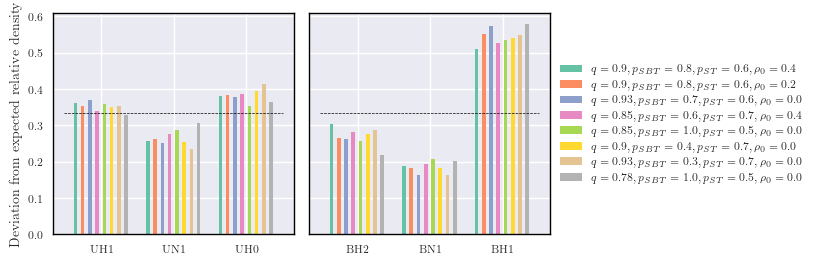

In [256]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki_rhoinit_new'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [222]:
# 0.8, 0.4, 0.9 (looking good overall, best in closest to 4 triads transformed, 6 triads trans, 4 triads corrdev trans, )
# 0.8, 0.7, 0.7 (slightly worse than above, best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )

sets_g = [(0.8, 0.4, 0.9), (0.8, 0.7, 0.7)]
df2_w1000_g.loc[sets_g]

q    p   ps  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
0.8 0.4 0.9  0.8  0.4  0.9            1  0.965761          0.0              1   
    0.7 0.7  0.8  0.7  0.7            1  0.963461          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
0.8 0.4 0.9  0.965761           0.0               1  ...   
    0.7 0.7  0.963461           0.0               1  ...   

             closest_to_four_triads  closest_to_four_triads_transformed  \
0.8 0.4 0.9                0.007137                            0.002214   
    0.7 0.7                0.006283                            0.003106   

             closest_to_six_triads  closest_to_six_triads_transformed  \
0.8 0.4 0.9               0.012661                           0.003949   
    0.7 0.7               0.011340                           0.004401   

             closest_to_six_triads_corrdevs_transformed  \
0.8 0.4 0.9                                    1.002214   
    0.7 0.7                                    1.003106   

             closest_to_four_triads_corrdevs_transformed  \
0.8 0.4 0.9                                     0.002214   
    0.7 0.7                                     0.003106   

             closest_to_six_triads_rho  closest_to_six_triads_rho_transformed  \
0.8 0.4 0.9                   0.158921                               0.062453   
    0.7 0.7                   0.153692                               0.061342   

             closest_to_four_triads_rho  \
0.8 0.4 0.9                    0.153397   
    0.7 0.7                    0.148635   

             closest_to_four_triads_rho_transformed  
0.8 0.4 0.9                                0.060718  
    0.7 0.7                                0.060046  

[2 rows x 50 columns]

[0.  0.1 0.2 0.3 0.4 0.5 0.6]


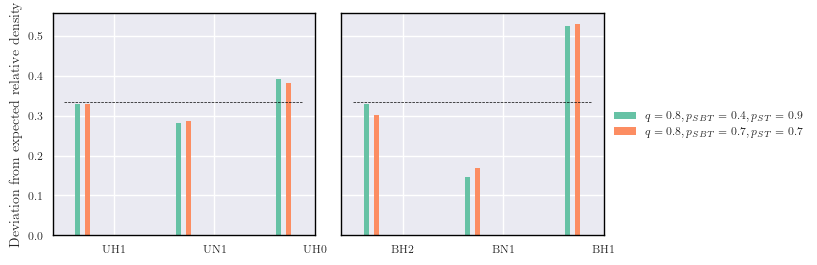

In [257]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki2_s1000_sim_best_grouped'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 